<a href="https://colab.research.google.com/github/lambertgarrido/gl_assignments/blob/main/Learner_Fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Note: This is a sample solution for the project. Projects will NOT be graded on the basis of how well the submission matches this sample solution. Projects will be graded on the basis of the rubric only.

# **Problem Statement**


---

#### **Business Context**  
Understanding customer personality and behavior is pivotal for businesses to enhance customer satisfaction and increase revenue. Segmentation based on a customer's personality, demographics, and purchasing behavior allows companies to create tailored marketing campaigns, improve customer retention, and optimize product offerings.  

A leading retail company with a rapidly growing customer base seeks to gain deeper insights into their customers' profiles. The company recognizes that understanding customer personalities, lifestyles, and purchasing habits can unlock significant opportunities for personalizing marketing strategies and creating loyalty programs. These insights can help address critical business challenges, such as improving the effectiveness of marketing campaigns, identifying high-value customer groups, and fostering long-term relationships with customers.  

With the competition intensifying in the retail space, moving away from generic strategies to more targeted and personalized approaches is essential for sustaining a competitive edge.  

---

#### **Objective**  
In an effort to optimize marketing efficiency and enhance customer experience, the company has embarked on a mission to identify distinct customer segments. By understanding the characteristics, preferences, and behaviors of each group, the company aims to:  
1. Develop personalized marketing campaigns to increase conversion rates.  
2. Create effective retention strategies for high-value customers.  
3. Optimize resource allocation, such as inventory management, pricing strategies, and store layouts.  

As a data scientist tasked with this project, your responsibility is to analyze the given customer data, apply machine learning techniques to segment the customer base, and provide actionable insights into the characteristics of each segment.  

---

#### **Data Dictionary**  
The dataset includes historical data on customer demographics, personality traits, and purchasing behaviors. Key attributes are:  

1. **Customer Information**  
   - **ID:** Unique identifier for each customer.  
   - **Year_Birth:** Customer's year of birth.  
   - **Education:** Education level of the customer.  
   - **Marital_Status:** Marital status of the customer.  
   - **Income:** Yearly household income (in dollars).  
   - **Kidhome:** Number of children in the household.  
   - **Teenhome:** Number of teenagers in the household.  
   - **Dt_Customer:** Date when the customer enrolled with the company.  
   - **Recency:** Number of days since the customer’s last purchase.  
   - **Complain:** Whether the customer complained in the last 2 years (1 for yes, 0 for no).  

2. **Spending Information (Last 2 Years)**  
   - **MntWines:** Amount spent on wine.  
   - **MntFruits:** Amount spent on fruits.  
   - **MntMeatProducts:** Amount spent on meat.  
   - **MntFishProducts:** Amount spent on fish.  
   - **MntSweetProducts:** Amount spent on sweets.  
   - **MntGoldProds:** Amount spent on gold products.  

3. **Purchase and Campaign Interaction**  
   - **NumDealsPurchases:** Number of purchases made using a discount.  
   - **AcceptedCmp1:** Response to the 1st campaign (1 for yes, 0 for no).  
   - **AcceptedCmp2:** Response to the 2nd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp3:** Response to the 3rd campaign (1 for yes, 0 for no).  
   - **AcceptedCmp4:** Response to the 4th campaign (1 for yes, 0 for no).  
   - **AcceptedCmp5:** Response to the 5th campaign (1 for yes, 0 for no).  
   - **Response:** Response to the last campaign (1 for yes, 0 for no).  

4. **Shopping Behavior**  
   - **NumWebPurchases:** Number of purchases made through the company’s website.  
   - **NumCatalogPurchases:** Number of purchases made using catalogs.  
   - **NumStorePurchases:** Number of purchases made directly in stores.  
   - **NumWebVisitsMonth:** Number of visits to the company’s website in the last month.  

# **Let's start coding!**

## **Importing necessary libraries**

In [ ]:


# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## **Loading the data**

In [ ]:
# uncomment and run the following line if using Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading data into a pandas dataframe
data = pd.read_csv("/content/drive/MyDrive/marketing_campaign.csv", sep="\t")

## **Data Overview**

#### **Question 1**: What are the data types of all the columns?

In [ ]:
# Write your code here.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### **Observations:** There are 29 columns; 3 are object type; 1 is floating type; rest are integer type

#### **Question 2:** Check the statistical summary of the data. What is the average household income?

In [ ]:
# Write your code here
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [ ]:
data.nunique()

,0
ID,2240
Year_Birth,59
Education,5
Marital_Status,8
Income,1974
Kidhome,3
Teenhome,3
Dt_Customer,663
Recency,100
MntWines,776


##### **Observations:** The average household income is 52247.251354. The variables starting with Mnt are right skewed (mean > median). There are several variables that are discrete and take only a few integer values. The columns starting with Z_ only take one value and can be dropped.

#### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method

In [ ]:
# Write your code here
data['Income'].isnull().sum()

24

In [ ]:
# Fill missing 'Income' values with the mean
data['Income'] = data['Income'].fillna(data['Income'].mean())


In [ ]:
data['Income'].isnull().sum()

0

In [ ]:
data.describe()['Income']

,Income
count,2240.000000
mean,52247.251354
std,25037.797168
min,1730.000000
25%,35538.750000
50%,51741.500000
75%,68289.750000
max,666666.000000


##### **Observations:** There are 24 records with missing income; the missing values were replaced with the mean income

#### **Question 4**: Are there any duplicates in the data?

In [ ]:
# Write your code here
data.duplicated().sum()

0

In [ ]:
# dropping ID column since it provides no insights
data.drop(columns = ['ID'], inplace = True)
data.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
# Checking for duplicates again
data.duplicated().sum()

182

In [ ]:
# After dropping ID column, there are now 182 duplicate record
# These duplicates will be dropped
data=data[~data.duplicated()]

In [ ]:
data.shape

(2058, 28)

In [ ]:
#dropping columns starting with Z_
data['Z_CostContact'].value_counts()

,count
Z_CostContact,
3,2058


In [ ]:
data['Z_Revenue'].value_counts()

,count
Z_Revenue,
11,2058


In [ ]:
data.drop(columns = ['Z_CostContact','Z_Revenue'], inplace = True)
data.shape

(2058, 26)

##### **Observations:** Once ID column was dropped, 182 duplicate records identified. These records were dropped. Columns starting with Z_ also dropped as these take the same value.

## **Exploratory Data Analysis**

### Univariate Analysis

#### **Question 5:** Explore all the variables and provide observations on their distributions. (histograms and boxplots)

In [ ]:
#explore columns of object data type
data['Education'].value_counts()

,count
Education,
Graduation,1030
PhD,450
Master,341
2n Cycle,188
Basic,49


In [ ]:
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,795
Together,521
Single,448
Divorced,216
Widow,71
Alone,3
Absurd,2
YOLO,2


In [ ]:
# prompt: Replace values Alone, Absurd, and YOLO in Marital_Status with Single

# Replace values Alone, Absurd, and YOLO in Marital_Status with Single
data['Marital_Status'] = data['Marital_Status'].replace(['Alone', 'Absurd', 'YOLO'], 'Single')
data['Marital_Status'].value_counts()

,count
Marital_Status,
Married,795
Together,521
Single,455
Divorced,216
Widow,71


In [ ]:
data['Dt_Customer'].value_counts()

,count
Dt_Customer,
12-05-2014,10
20-08-2013,9
02-01-2013,9
12-09-2012,9
31-08-2012,9
...,...
26-10-2013,1
26-04-2014,1
09-06-2013,1


In [ ]:
# Convert 'Dt_Customer' to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
data['Dt_Customer'].value_counts()

,count
Dt_Customer,
2014-05-12,10
2013-08-20,9
2013-01-02,9
2012-09-12,9
2012-08-31,9
...,...
2013-10-26,1
2014-04-26,1
2013-06-09,1


In [ ]:
#exclude columns of object data type
cols=list(data.columns)
cols.remove('Education')
cols.remove('Marital_Status')
#cols.remove('Dt_Customer')
cols

['Year_Birth',
 'Income',
 'Kidhome',
 'Teenhome',
 'Dt_Customer',
 'Recency',
 'MntWines',
 'MntFruits',
 'MntMeatProducts',
 'MntFishProducts',
 'MntSweetProducts',
 'MntGoldProds',
 'NumDealsPurchases',
 'NumWebPurchases',
 'NumCatalogPurchases',
 'NumStorePurchases',
 'NumWebVisitsMonth',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Complain',
 'Response']

Year_Birth


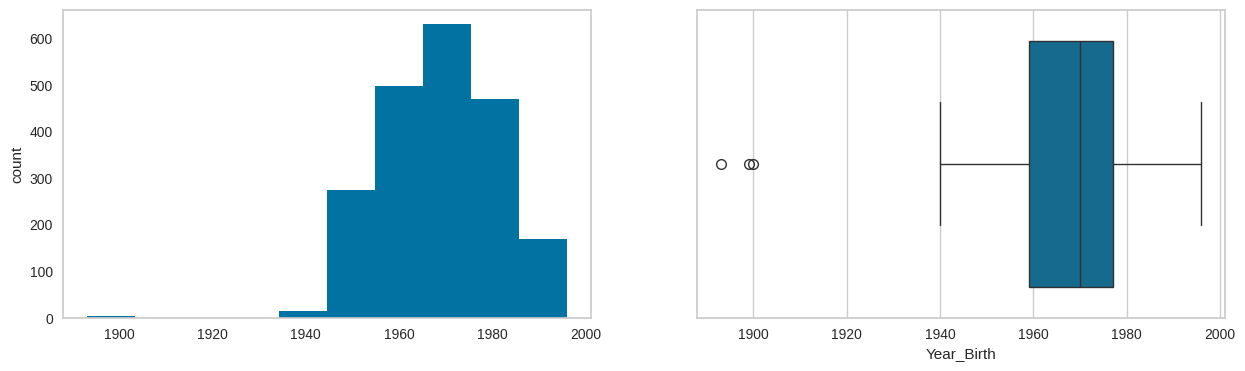



Income


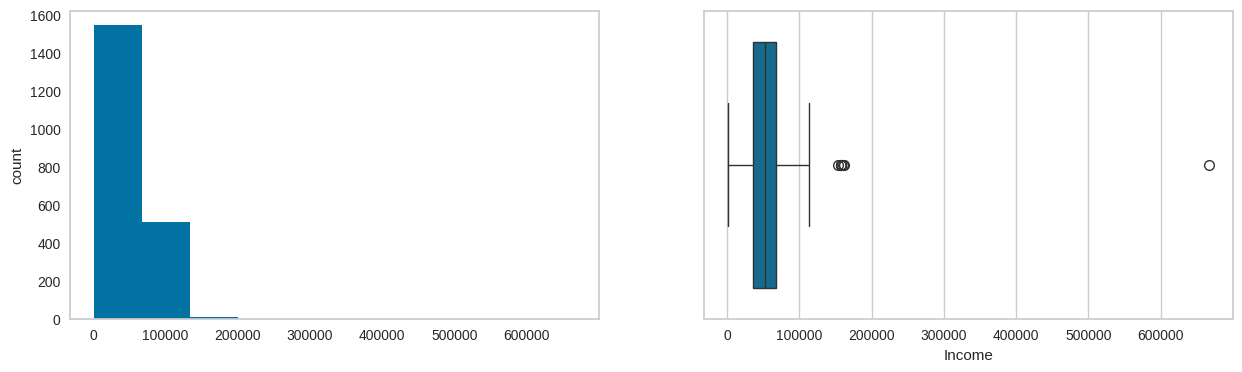



Kidhome


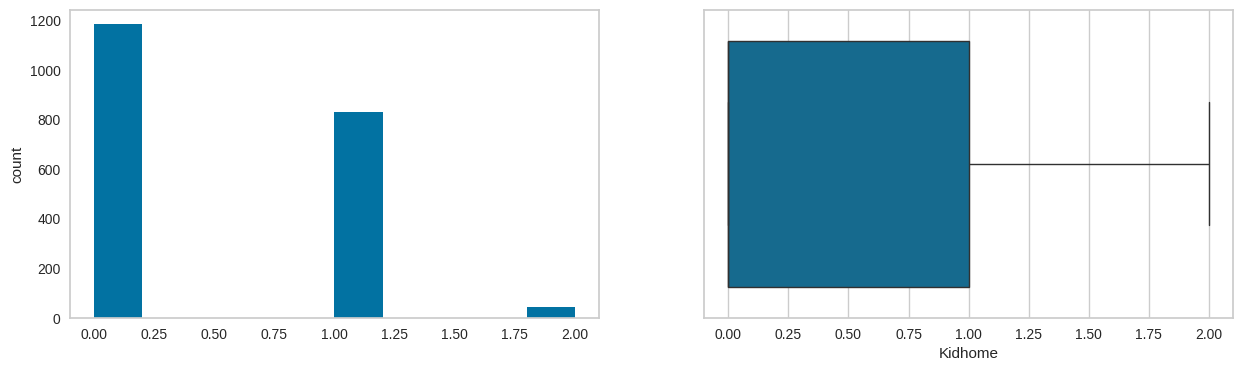



Teenhome


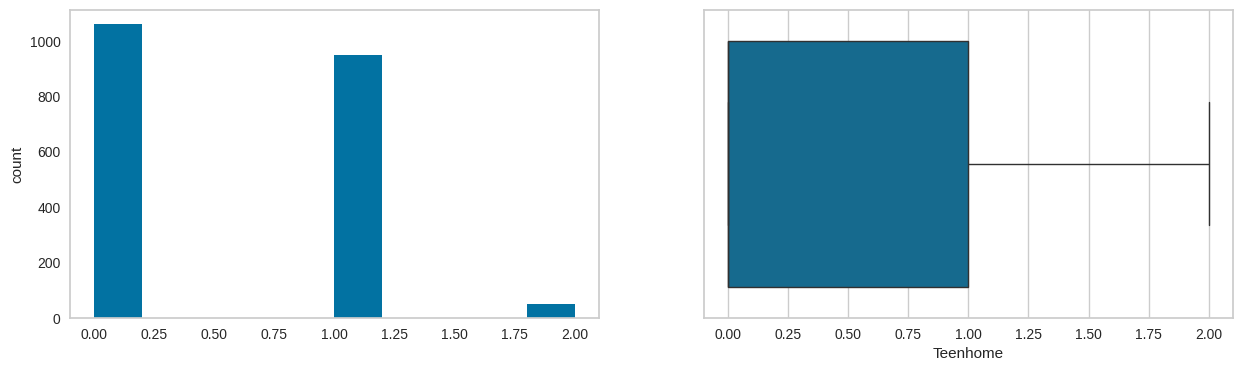



Dt_Customer


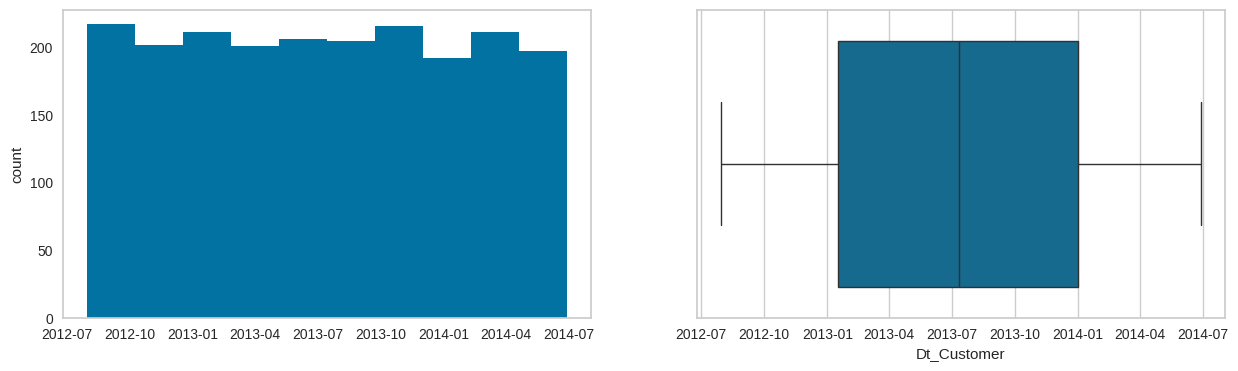



Recency


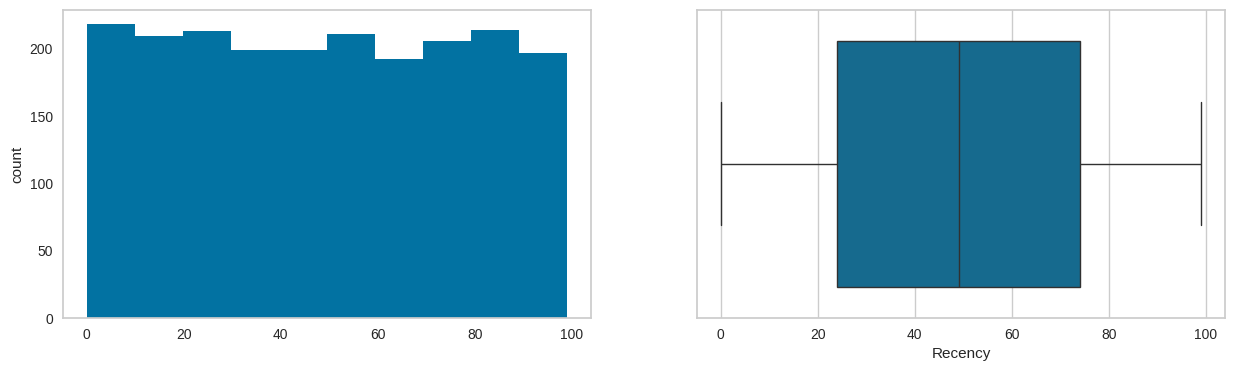



MntWines


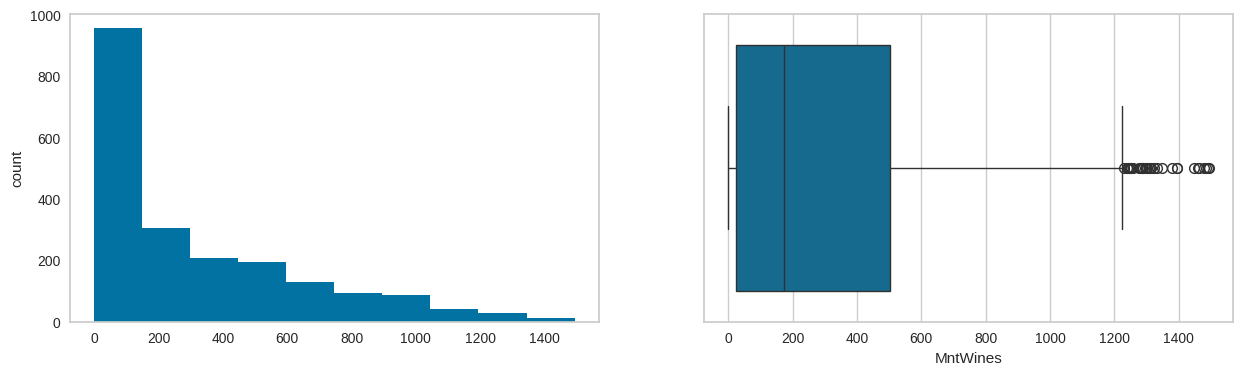



MntFruits


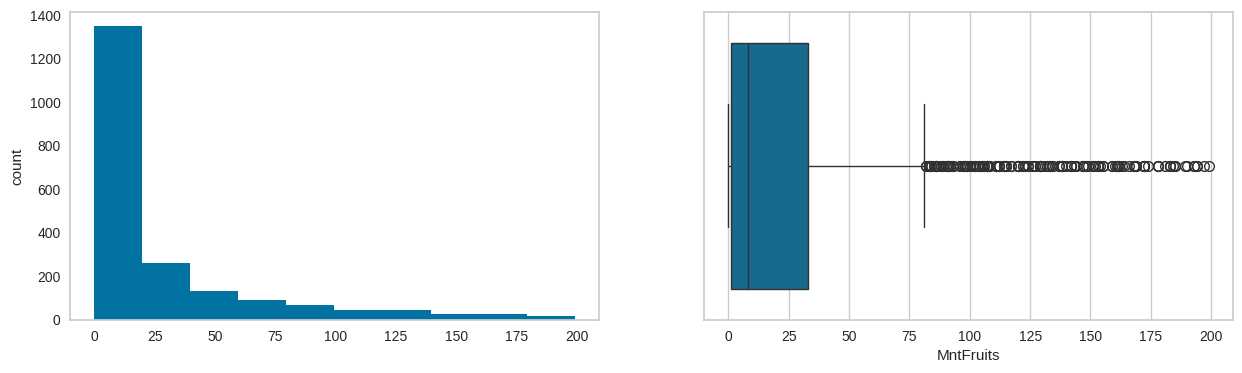



MntMeatProducts


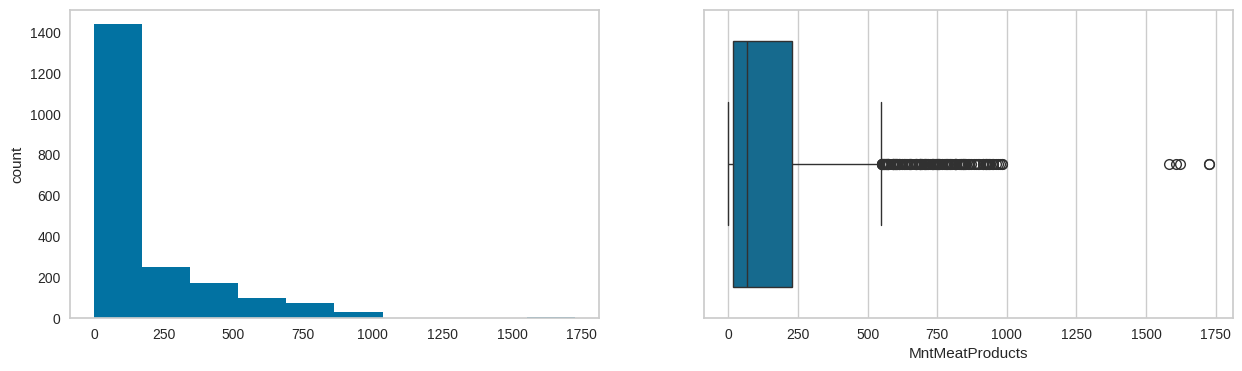



MntFishProducts


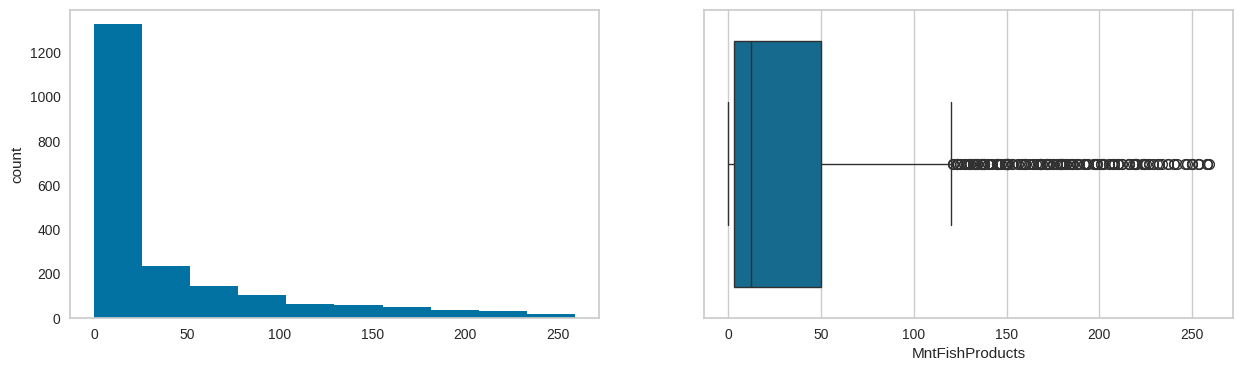



MntSweetProducts


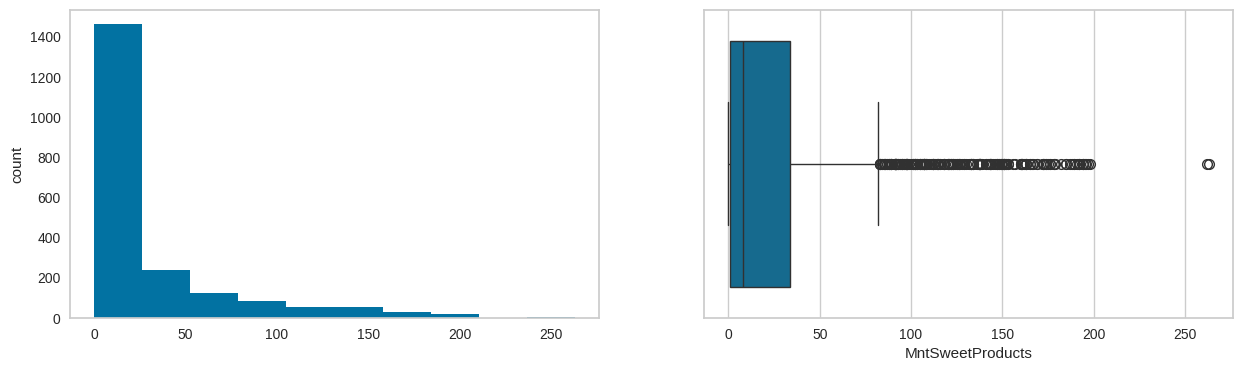



MntGoldProds


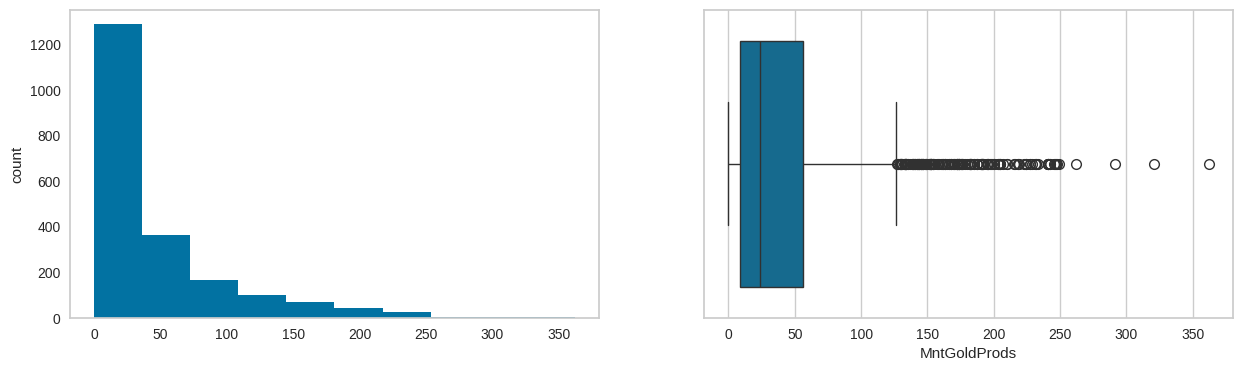



NumDealsPurchases


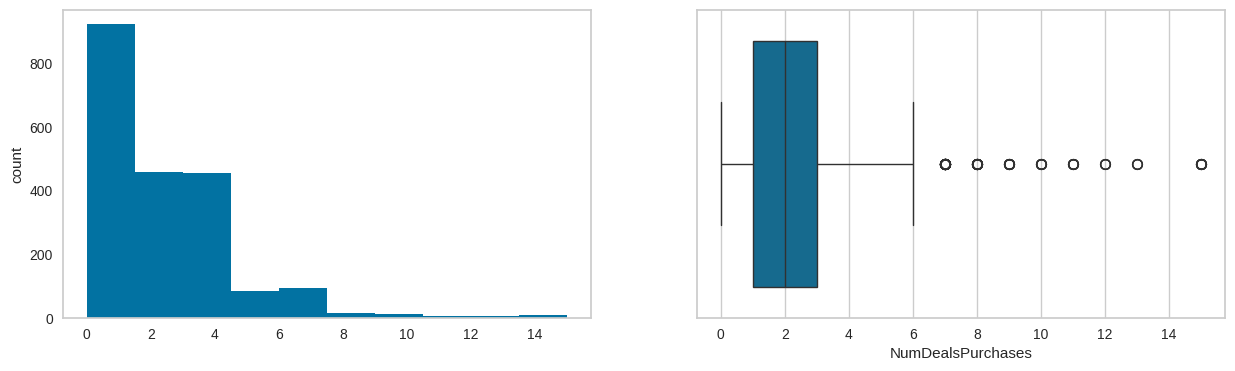



NumWebPurchases


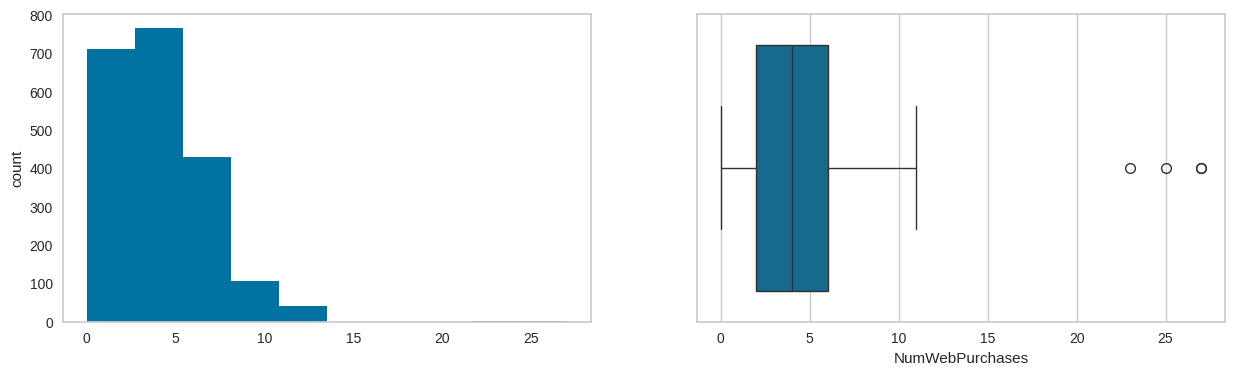



NumCatalogPurchases


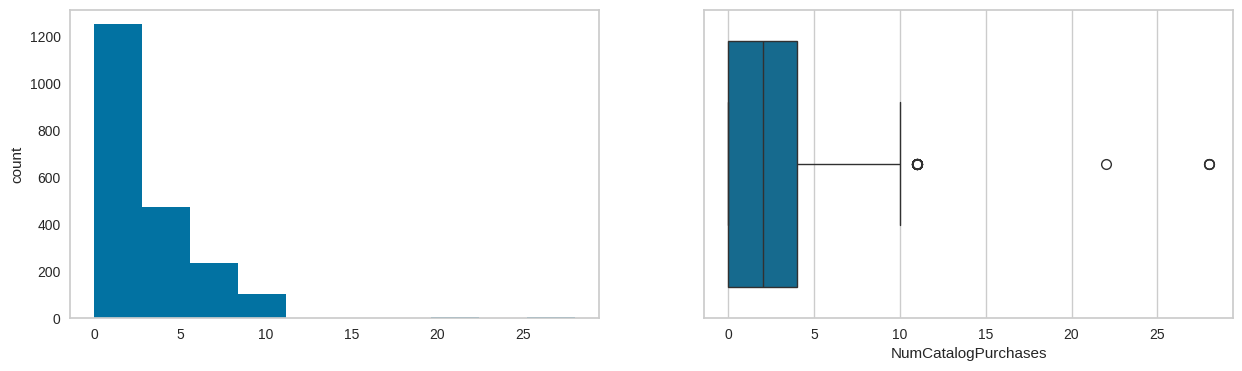



NumStorePurchases


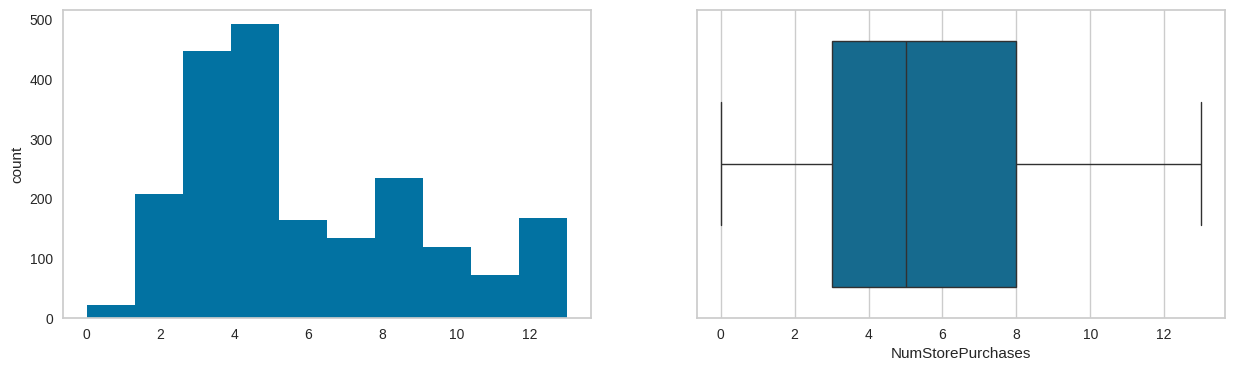



NumWebVisitsMonth


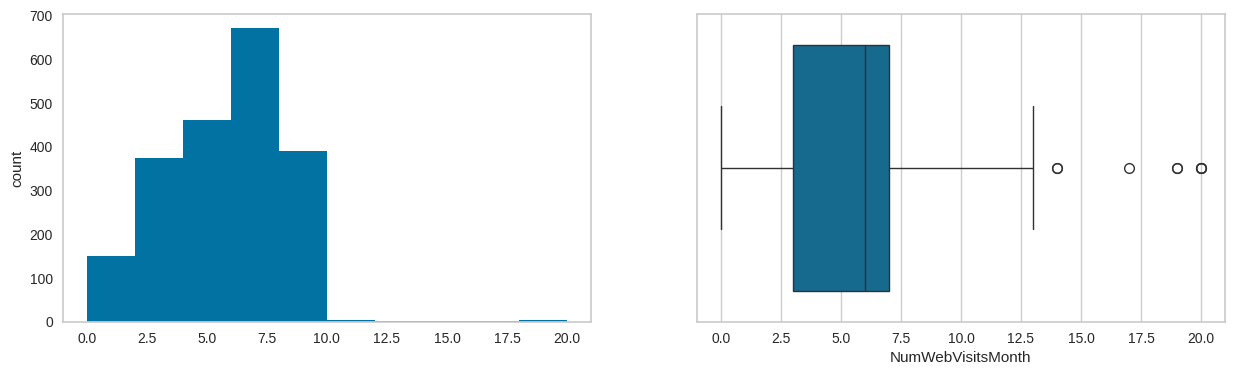



AcceptedCmp3


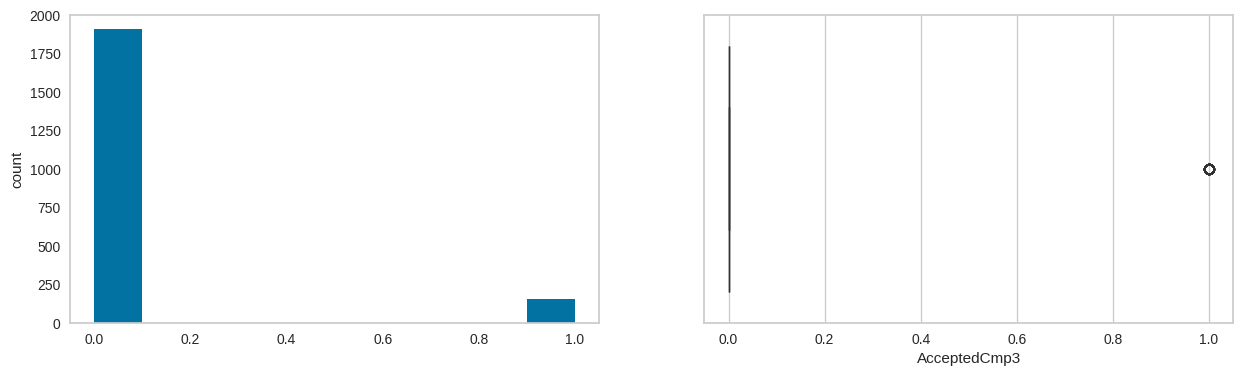



AcceptedCmp4


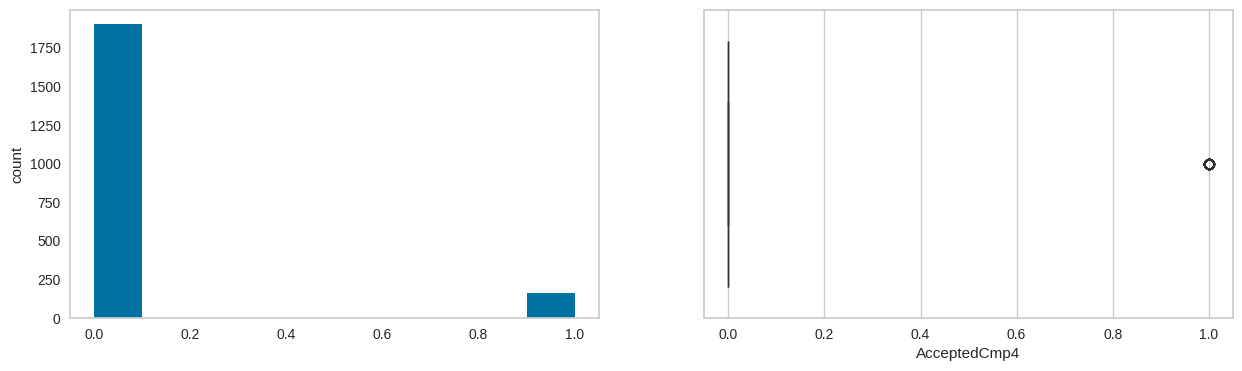



AcceptedCmp5


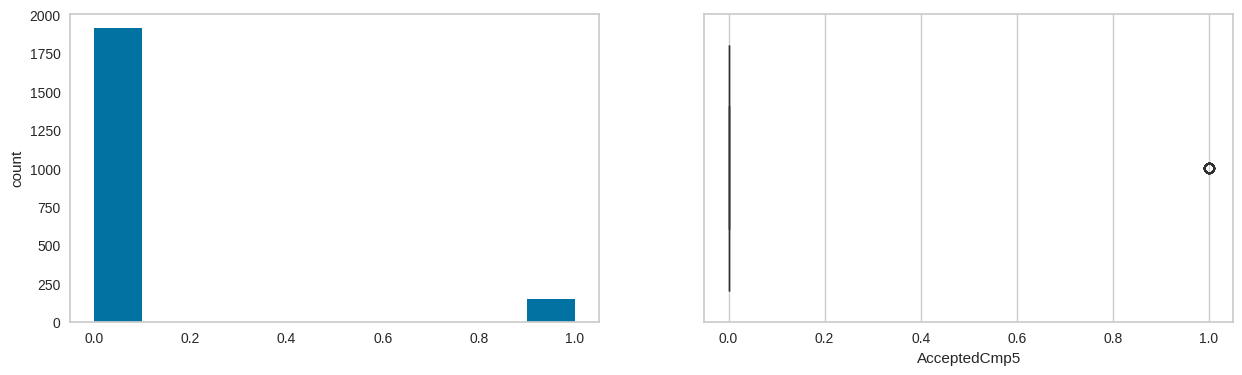



AcceptedCmp1


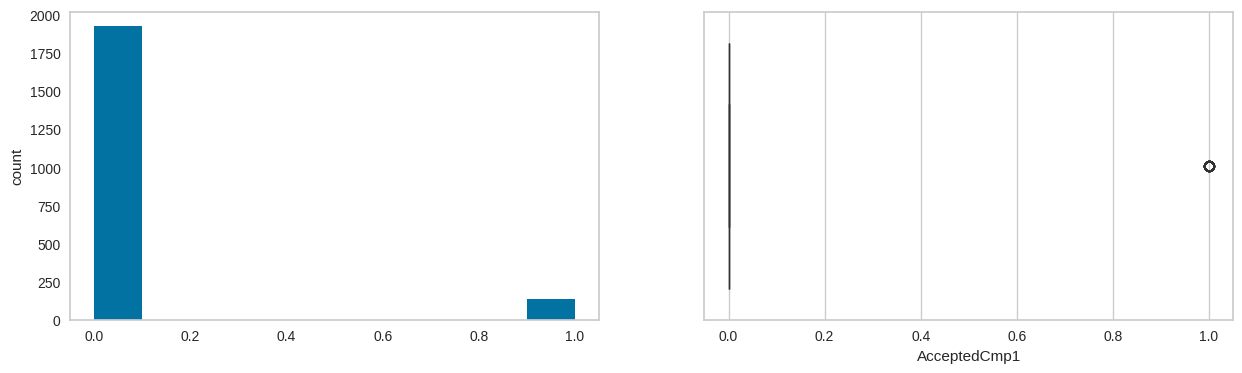



AcceptedCmp2


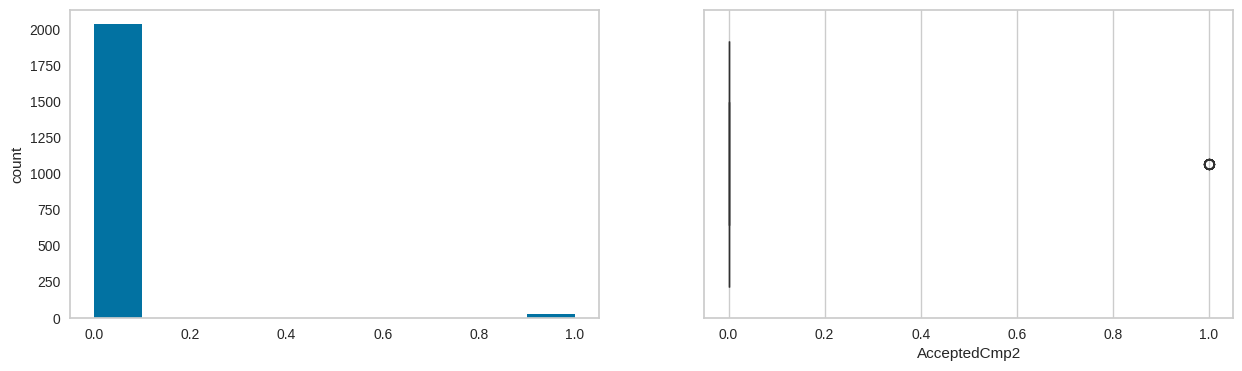



Complain


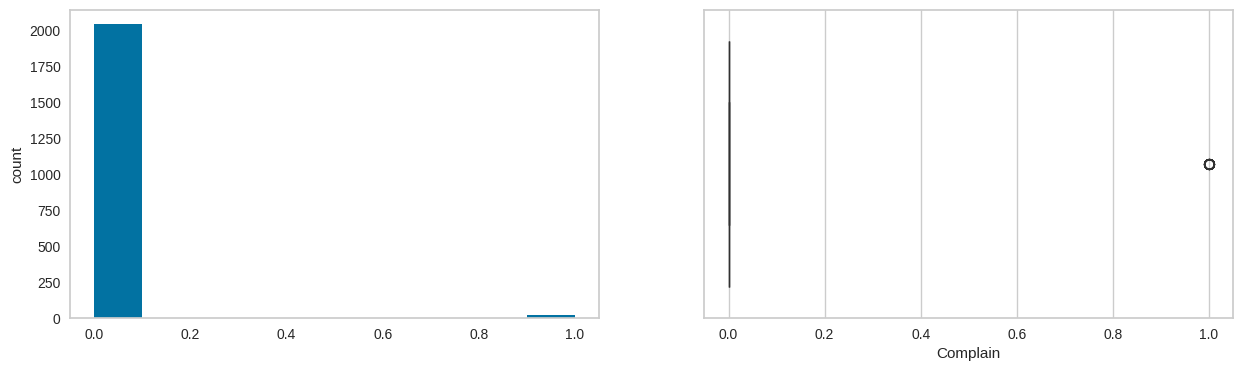



Response


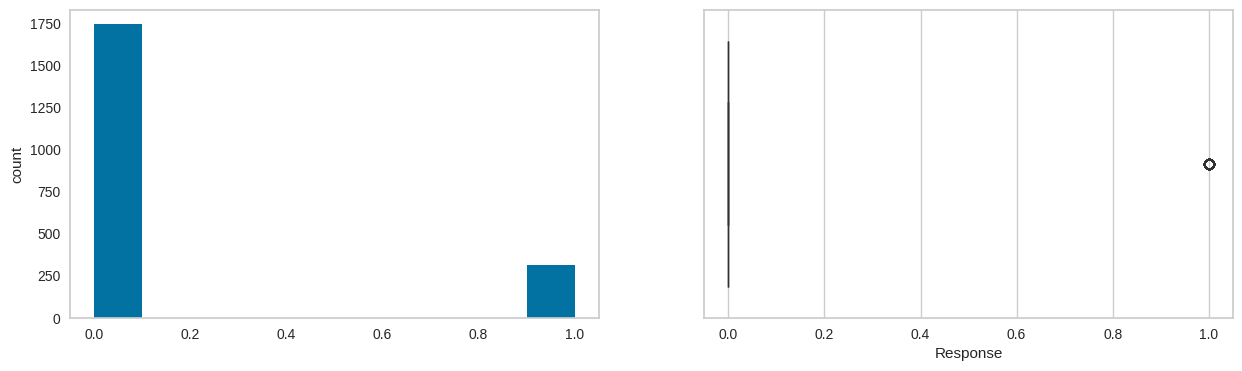

In [ ]:
# Write your code here
# Create histograms and boxplots for the numerical data
for col in cols:
    print(col)
    #print('Skew :',round(data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=data[col])
    plt.show()
    print('\n')

##### **Observations:**
Year_Birth: Normal distribution but some outliers with DOB 1900. Will set these to the mean Year_Birth

Income: Some outliers due to high-income earners

Kidhome: Most customers have 0 or 1 kid. Few customers have 2 kids

Teenhome: Same as Kidhome

Dt_Customer: Uniform distribution of dates, ranging from July 2012 to July 2014

Recency: Uniform distribution raging from 0 to 100

MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds: Highly right skewed distributions

NumDealsPurchases, NumWebPurchases, NumCatalogPurchases NumStorePurchases, NumWebVisitsMonth: Take on integer values; mean and median not too different, so skewness slight; NumStorePurchase has no outliers in box plot

Rest of columns: Take values either 0 or 1. Majority of samples report 0

In [ ]:
data.loc[data['Year_Birth'] < 1910]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
192,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,0
239,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,0
339,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,0


In [ ]:
# prompt: Replace values of Year_Birth less than 1910 with the Year_Birth mean

# Calculate the mean of 'Year_Birth'
year_birth_mean = data['Year_Birth'].mean()

# Replace values less than 1910 with the mean
data.loc[data['Year_Birth'] < 1910, 'Year_Birth'] = year_birth_mean


In [ ]:
(data['Year_Birth'] < 1910).sum()

0

In [ ]:
data['Year_Birth'].min()

1940.0

### Bivariate Analysis

#### **Question 6:** Perform multivariate analysis to explore the relationsips between the variables.

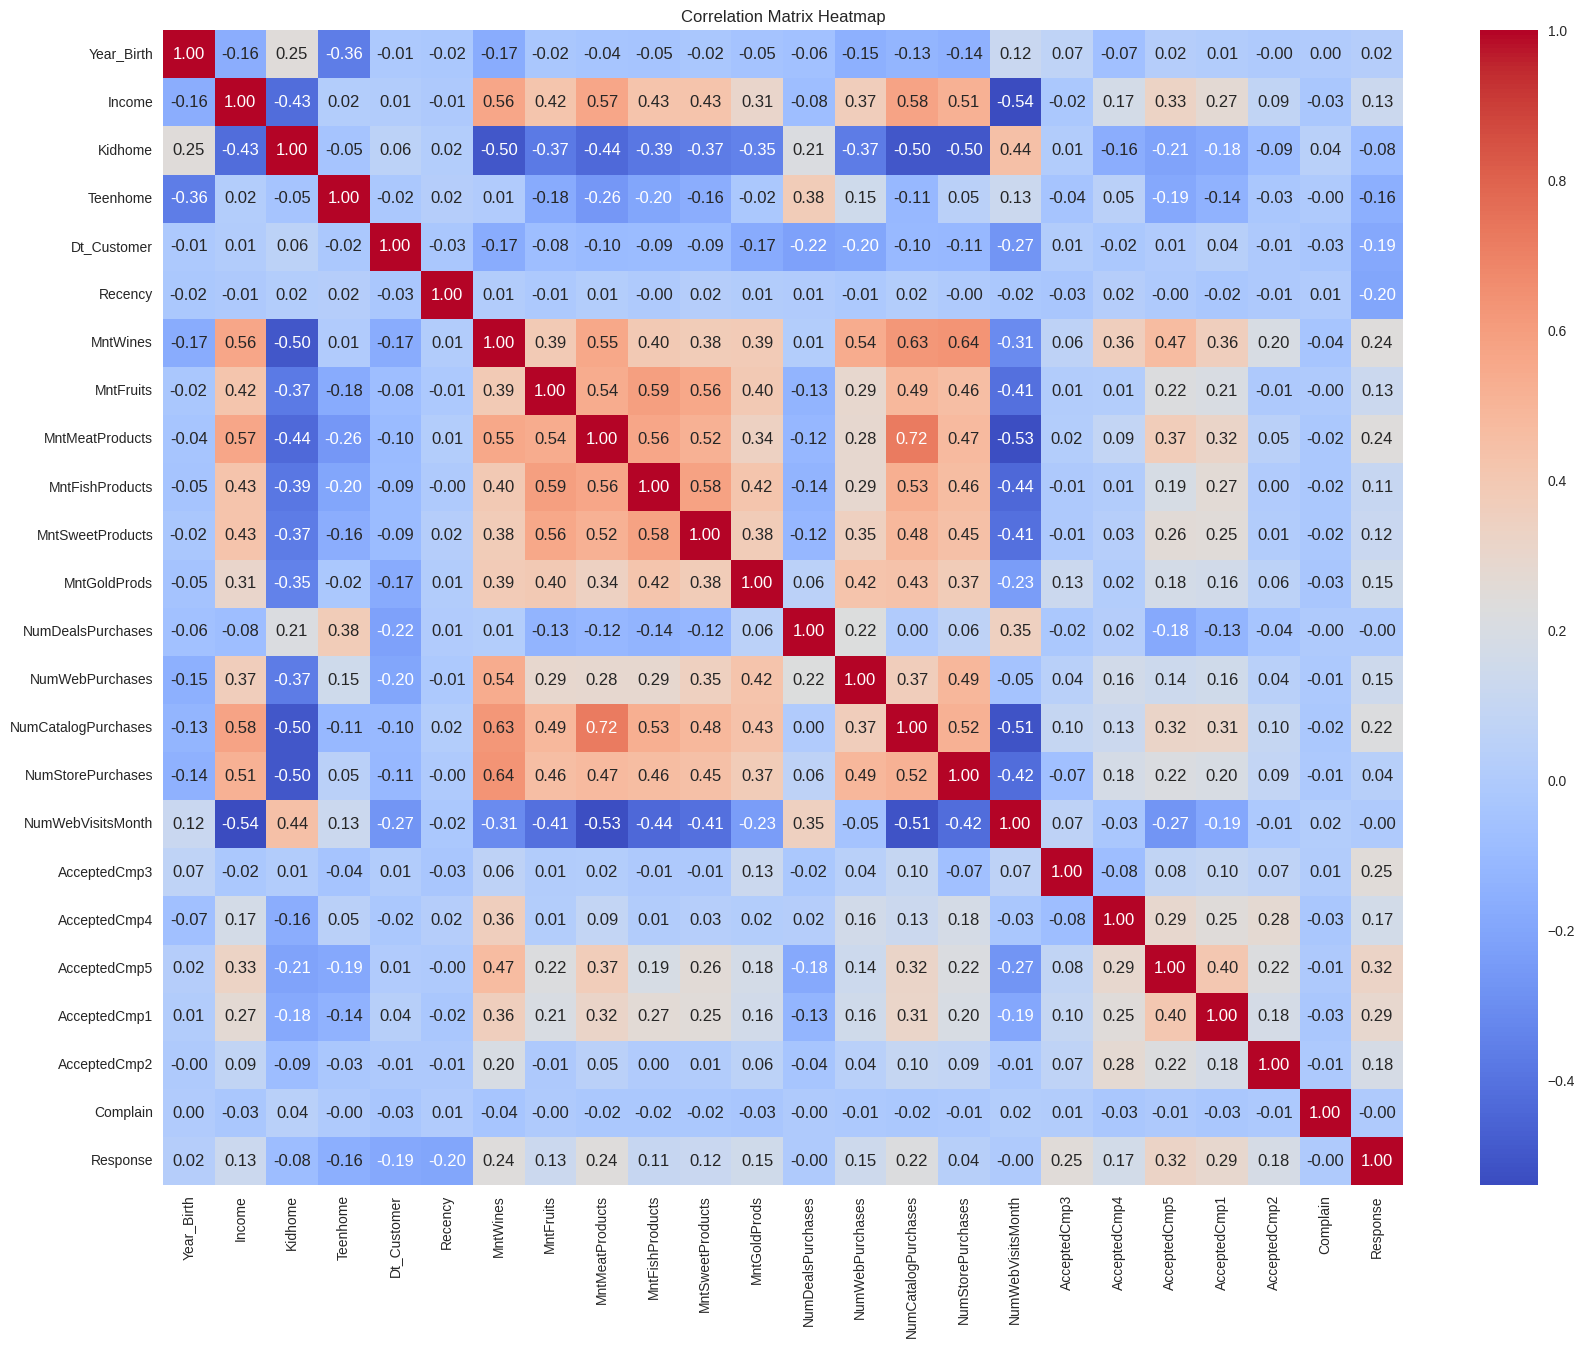

In [ ]:
# Write your code here

# Calculate the correlation matrix
corr_matrix = data[cols].corr()

# Create a heatmap
plt.figure(figsize=(20, 15))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()


##### **Observations:**
Income is positively correlated with MntWines, MntMeatProducts, NumCatalogPurchases, NumStorePurchases. Income is negatively correlated with NumWebVisitsMonth and KidHome

KidHome is negatively correlated with Income, MntWines, MntMeatProducts, NumCatalogPurchases, NumStorePurchases. KidHome is positively correlated with NumberWebVisitsMonth

Data indicates one customer profile of wealthy individuals who consume higher number of of wines and meat products. They also prefer to visit the store and make catalog purchases.

The other customer profile consists of individuals with kids. They tend to spend less on wine and meat products. They are more active users of the store website.




## **K-means Clustering**

#### **Question 7** : Select the appropriate number of clusters using the elbow Plot. What do you think is the appropriate number of clusters?

In [ ]:
# will only include continous variables in the following analysis
cols = ['Year_Birth','Income','Kidhome','Teenhome','Recency','MntWines',
        'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts',
        'MntGoldProds','NumDealsPurchases','NumWebPurchases',
        'NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth',
        'Dt_Customer']

In [ ]:
ealiest_dt=data['Dt_Customer'].min()
data['Dt_Customer'] = (data['Dt_Customer'] - ealiest_dt).dt.days

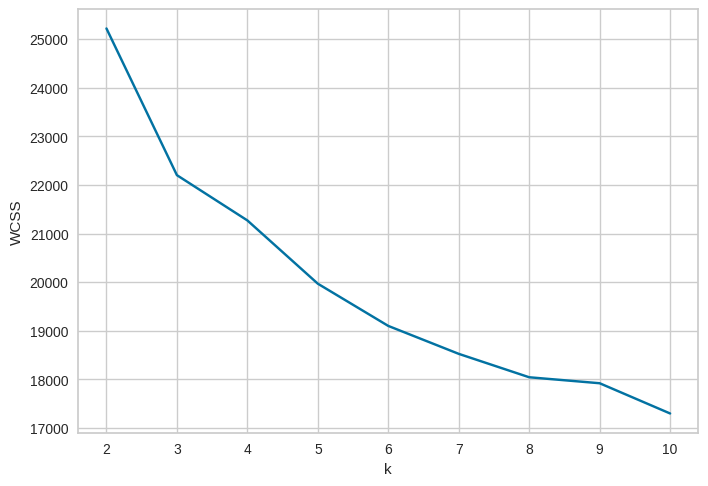

In [ ]:
# Write your code here

X = data[cols]

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertias = []

K = range(2, 11)  # Test k values from 2 to 10

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    kmeanModel.fit(X_scaled)

    inertias.append(kmeanModel.inertia_)

# Plot the inertia curve
plt.plot(K, inertias, 'bx-')
plt.xlabel('k')
plt.ylabel('WCSS')
plt.show()


##### **Observations:** Elbow plot does not show an appropriate value for k

#### **Question 8** : finalize appropriate number of clusters by checking the silhoutte score as well. Is the answer different from the elbow plot?

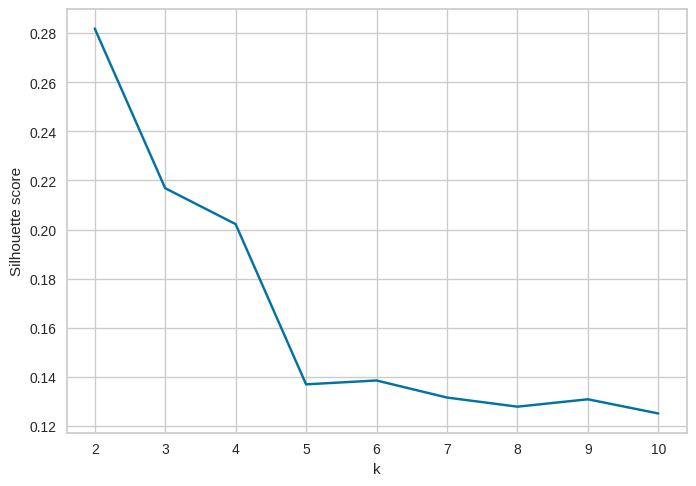

In [ ]:
# Write your code here

range_n_clusters = range(2, 11)
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()


##### **Observations:** Silhoute score is highest for k = 2. So appropriate number of clusters is 2.

#### **Question 9**: Do a final fit with the appropriate number of clusters. How much total time does it take for the model to fit the data?

In [ ]:
# Write your code here

num_clusters=2
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)
data['cluster_labels'] = kmeans.labels_
data['cluster_labels'].value_counts()

,count
cluster_labels,
0,1211
1,847


##### **Observations:** Fitting data to model takes very little time, a fraction of a second. Two clusters are indicated. One cluster has 1248 points, and other cluster has 810 points.

## **Hierarchical Clustering**

#### **Question 10**: Calculate the cophnetic correlation for every combination of distance metrics and linkage. Which combination has the highest cophnetic correlation?

In [ ]:
# Write your code here

metrics = ['euclidean','chebyshev','mahalanobis']
methods = ['single', 'complete', 'average']

# Enumerate through the list of all methods above, get linkage and plot dendrogram

c_max = -float('inf')

for metric in metrics:
  for method in methods:

    Z = linkage(X_scaled, metric = metric, method = method)
    c, c_dist = cophenet(Z, pdist(X_scaled))

    if c > c_max:
      c_max = c
      idx_max = (metric, method)

In [ ]:
c_max

0.8202561489197657

In [ ]:
idx_max

('euclidean', 'average')

In [ ]:
# Write your code here

metrics = ['euclidean']
methods = ['single', 'complete', 'average', 'ward']

# Enumerate through the list of all methods above, get linkage and plot dendrogram

c_max = -float('inf')

for metric in metrics:
  for method in methods:

    Z = linkage(X_scaled, metric = metric, method = method)
    c, c_dist = cophenet(Z, pdist(X_scaled))

    if c > c_max:
      c_max = c
      idx_max = (metric, method)

In [ ]:
c_max

0.8202561489197657

In [ ]:
idx_max

('euclidean', 'average')

##### **Observations:** Highest cophenetic correlation is 0.82 with metric euclidean and method average

#### **Question 11**: plot the dendogram for every linkage method with "Euclidean" distance only. What should be the appropriate linkage according to the plot?

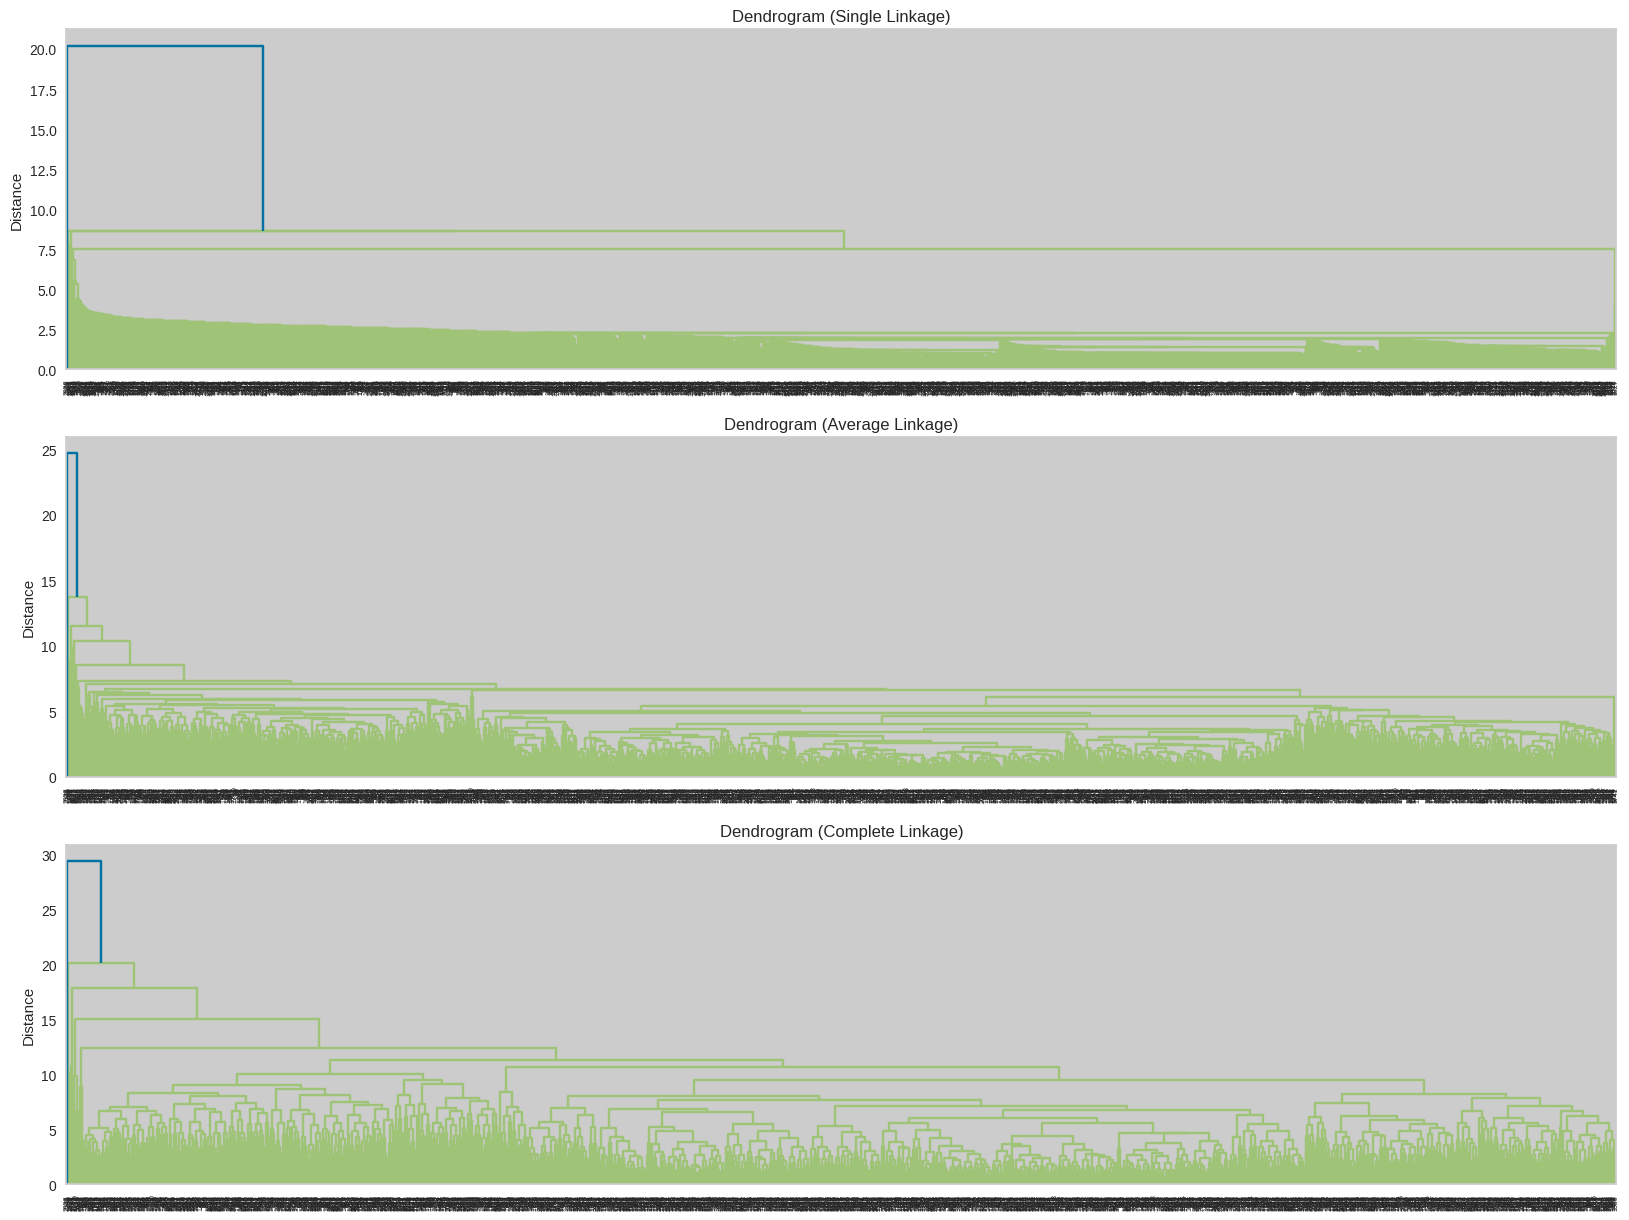

In [ ]:
# Write your code here

# The List of all linkage methods to check
methods = ['single',
           'average',
           'complete']

# Create a subplot image
fig, axs = plt.subplots(len(methods), 1, figsize = (20, 15))

# Enumerate through the list of all methods above, get linkage and plot dendrogram
for i, method in enumerate(methods):
    Z = linkage(X_scaled, metric = 'euclidean', method = method)

    dendrogram(Z, ax = axs[i]);

    axs[i].set_title(f'Dendrogram ({method.capitalize()} Linkage)')

    axs[i].set_ylabel('Distance')

##### **Observations:** Complete linkage gives better separated clusters.

#### **Question 12:** Check the silhoutte score for the hierchial clustering. What should be the appropriate number of clusters according to this plot?

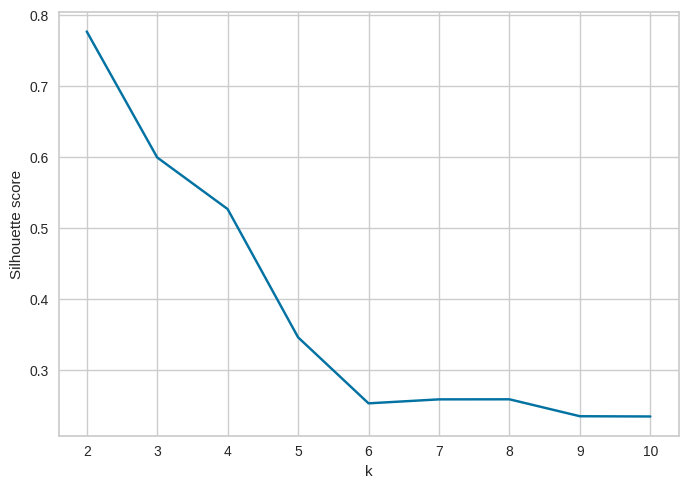

In [ ]:
# Write your code here

range_n_clusters = range(2, 11)
silhouette_avg = []

for num_clusters in range_n_clusters:
    # initialise kmeans
    hierarchical = AgglomerativeClustering(n_clusters=num_clusters,
                                           linkage='complete')
    hierarchical.fit(X_scaled)
    cluster_labels = hierarchical.labels_

    # silhouette score
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('k')
plt.ylabel('Silhouette score')
plt.show()


##### **Observations:** Two clusters is the appropriate number according to plot above.

#### **Question 13**: Fit the Hierarchial clustering model with the appropriate parameters finalized above. How much time does it take to fit the model?

In [ ]:
# Write your code here
num_clusters=2
hierarchical = AgglomerativeClustering(n_clusters=num_clusters,
                                       linkage='complete')
hierarchical.fit(X_scaled)
data['cluster_labels_hc'] = hierarchical.labels_
data['cluster_labels_hc'].value_counts()

,count
cluster_labels_hc,
0,2057
1,1


##### **Observations:** Fitting model takes less than a second

## **Cluster Profiling and Comparison**

### K-Means Clustering vs Hierarchical Clustering Comparison

#### **Question 14**: Perform and compare Cluster profiling on both algorithms using boxplots. Based on the all the observaions Which one of them provides better clustering?

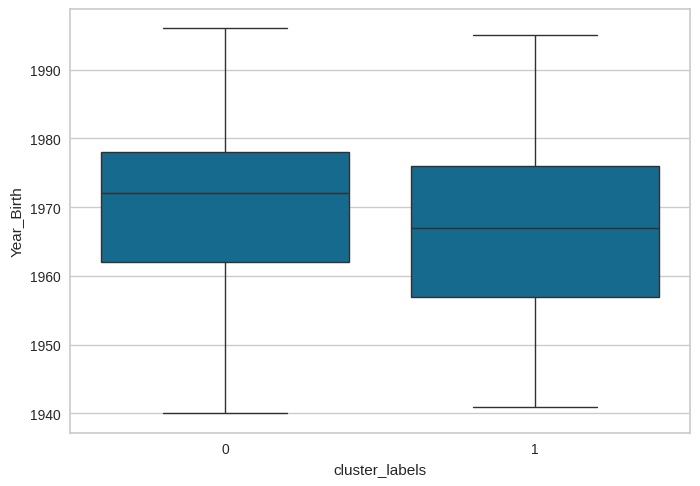

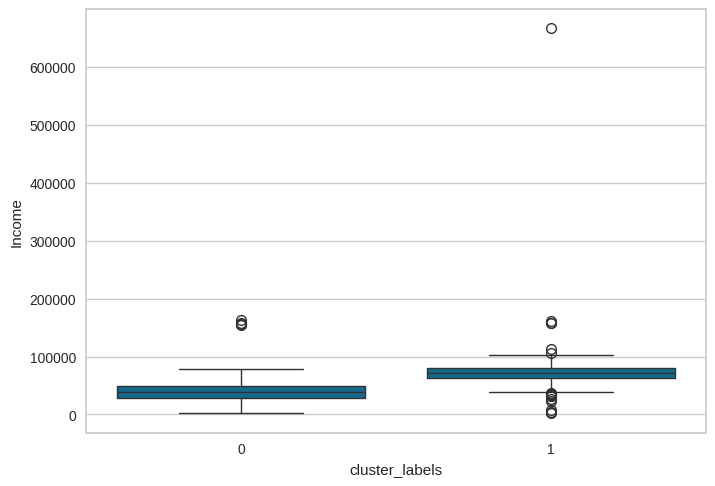

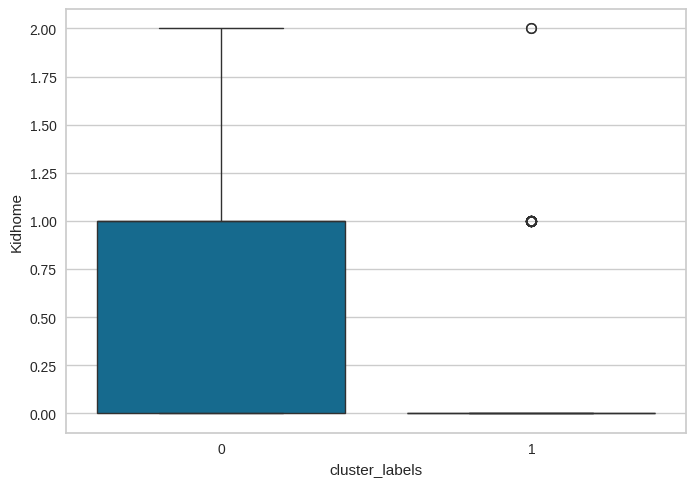

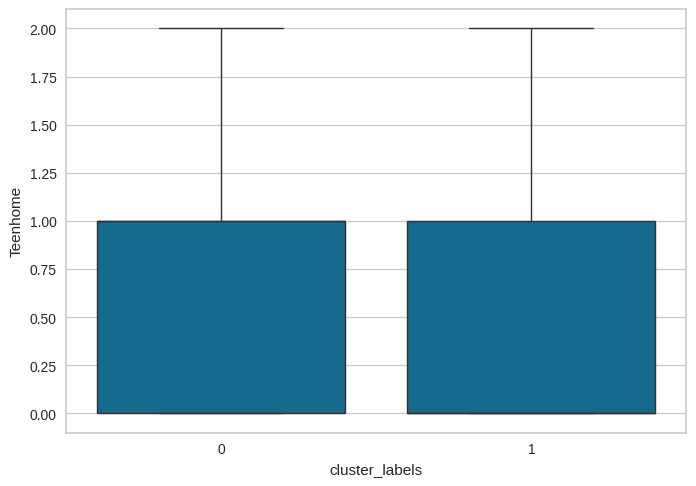

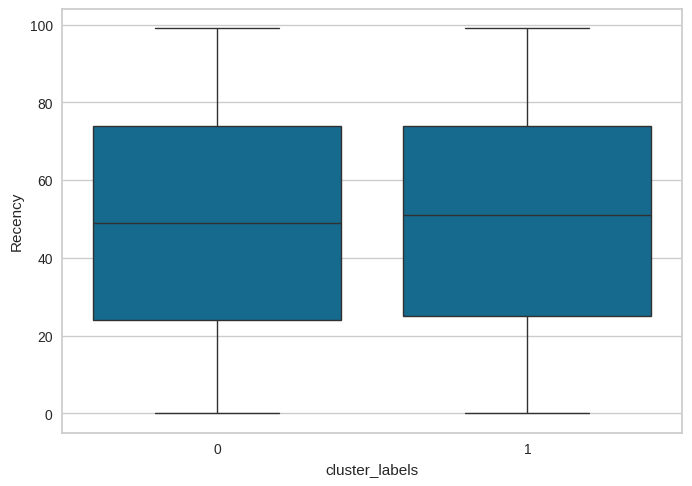

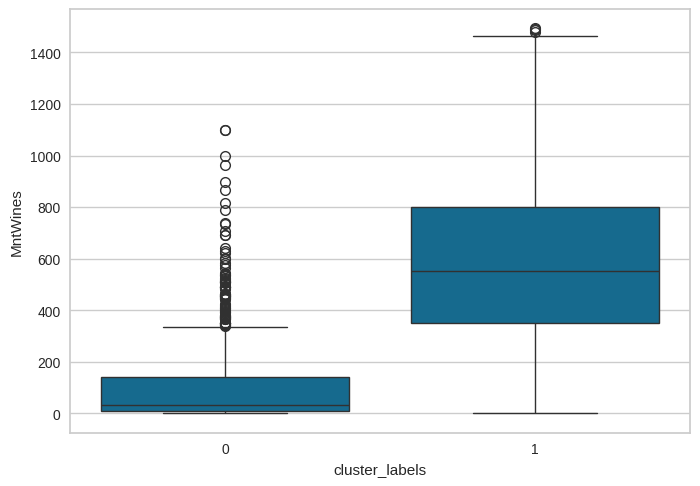

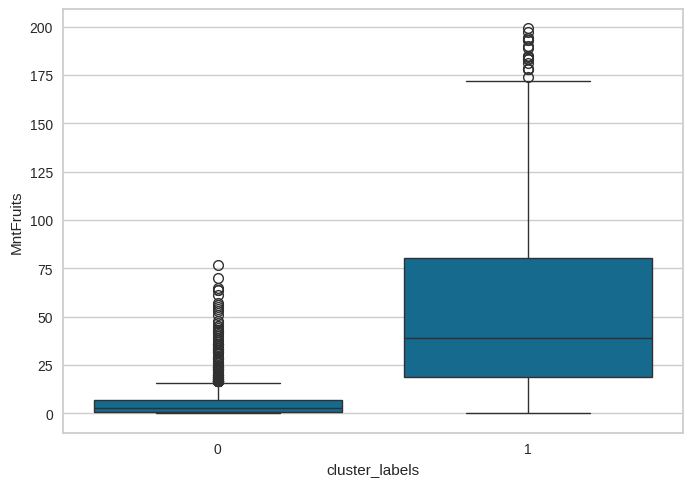

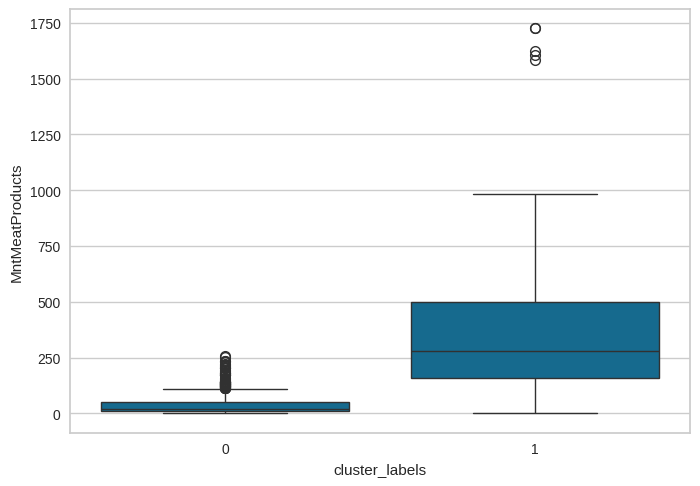

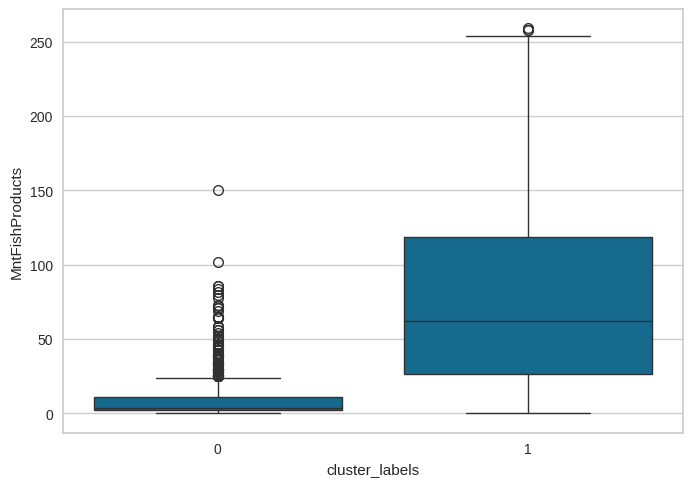

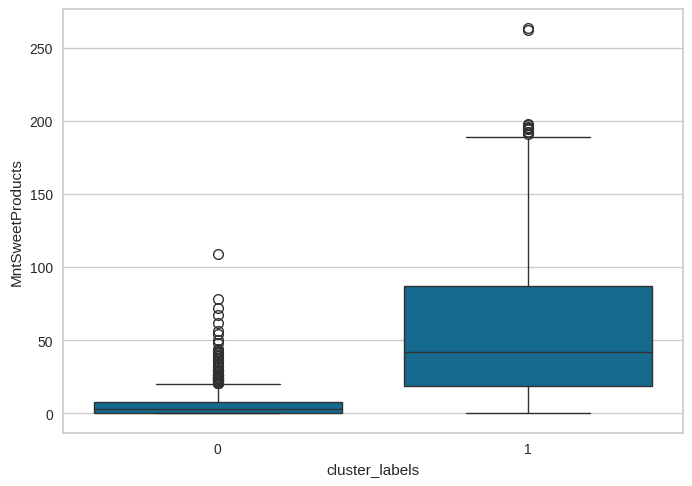

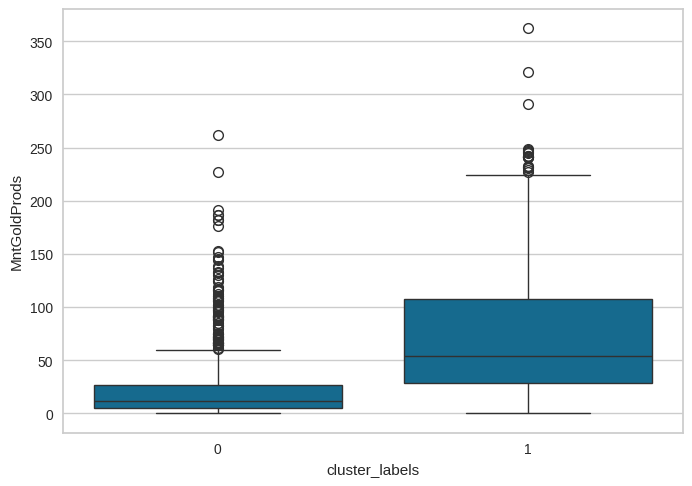

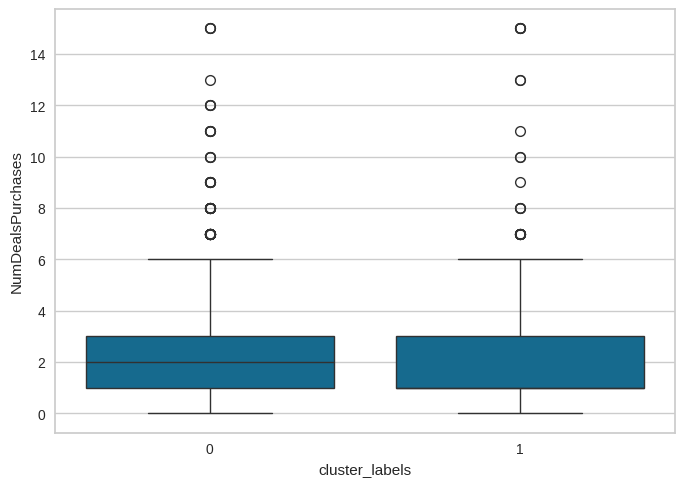

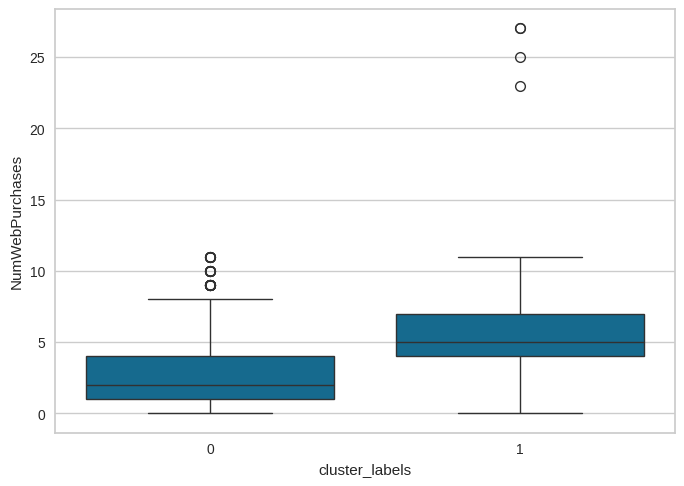

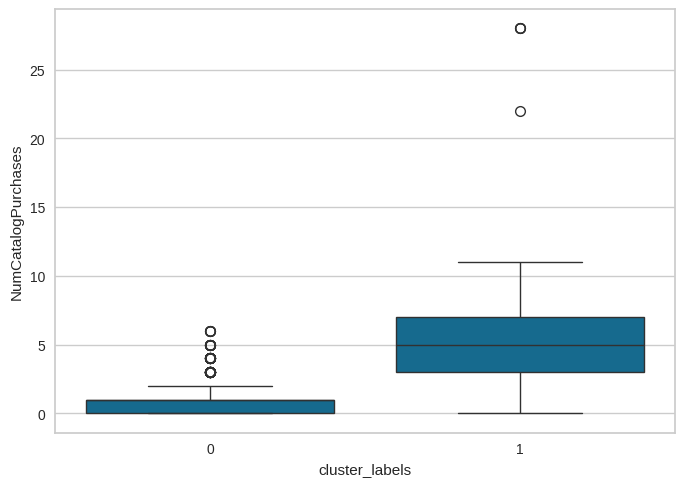

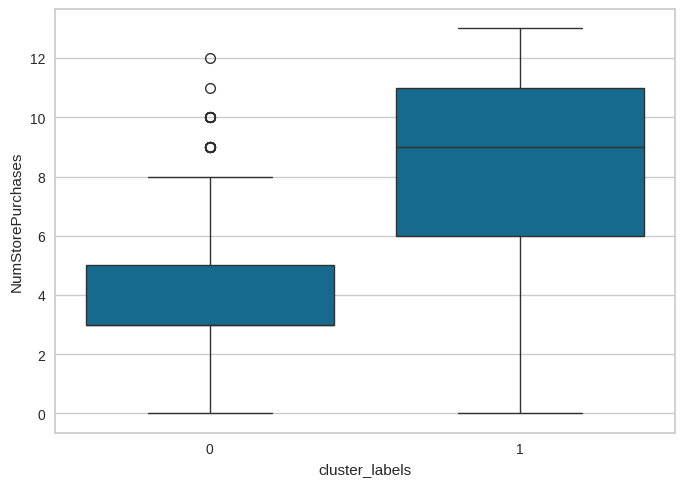

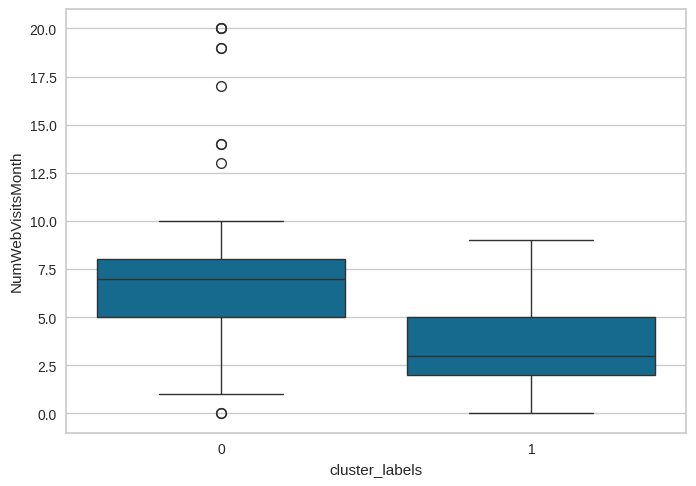

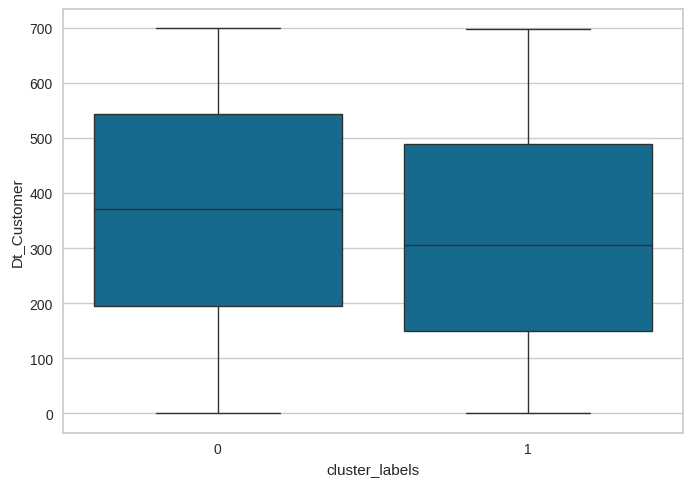

In [ ]:
# Write your code here
cols_visualise = ['Year_Birth', 'Income', 'Kidhome', 'Teenhome',
                  'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
                  'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
                  'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
                  'NumStorePurchases','NumWebVisitsMonth','Dt_Customer']

for col in cols_visualise:
    sns.boxplot(x = 'cluster_labels', y = col, data = data)
    plt.show()

##### **Observations:** I only ran box plots for K-means, as hierarchical only created one cluster with all data except for one point in other cluster. The box plot for k-means confirms the original multivariate analysis.

#### Cluster 1 describes older, wealthier individuals who consume higher number of of wines and meat products. They tend to make more purchases at the store, online, or via catalog.

#### Cluster 0 consists of younger individuals with kids. They tend to spend less on wine and meat products. They interact more with the store website.


#### **Question 15**: Perform Cluster profiling on the data with the appropriate algorithm determined above using a barplot. What observations can be derived for each cluster from this plot?

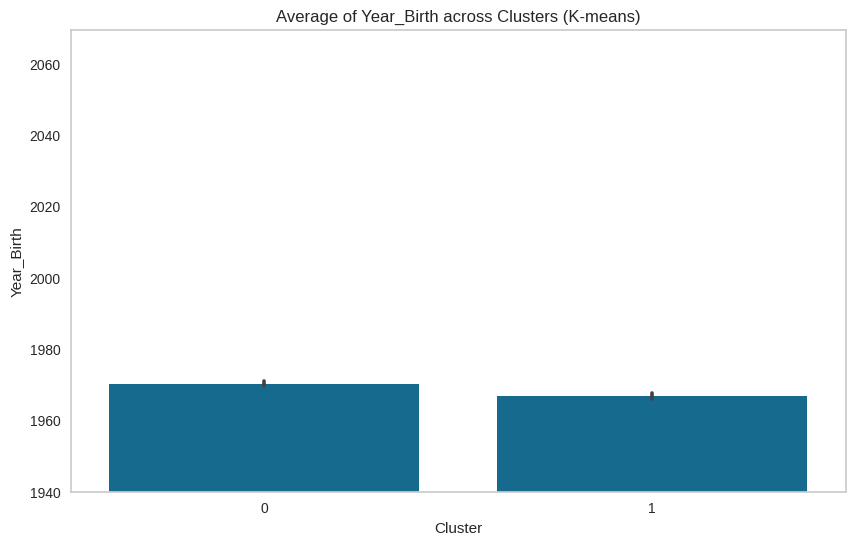

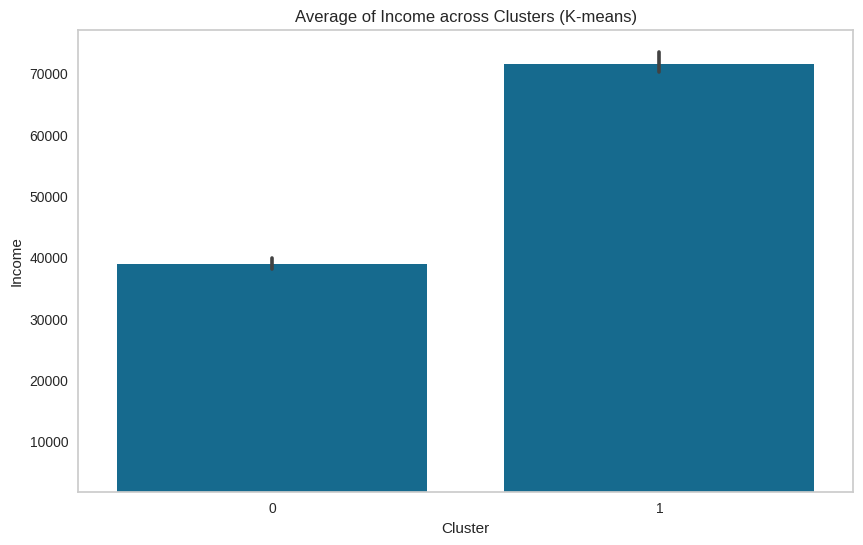

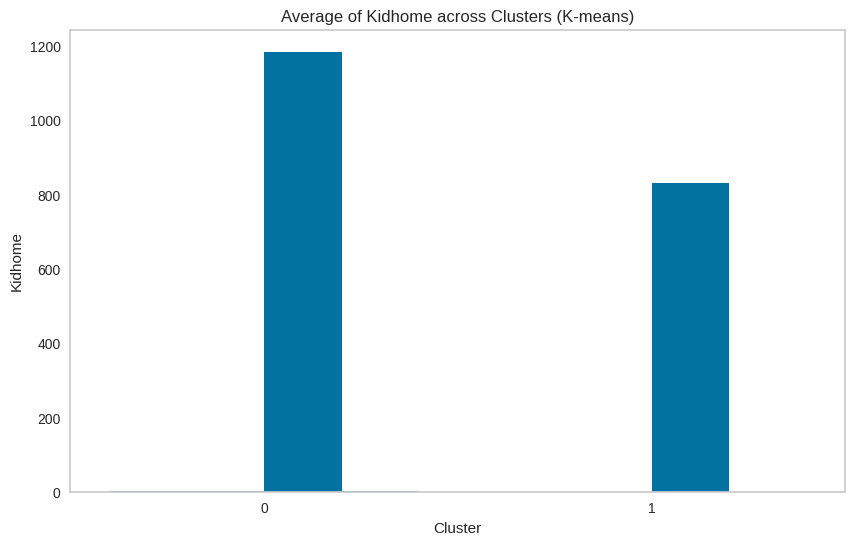

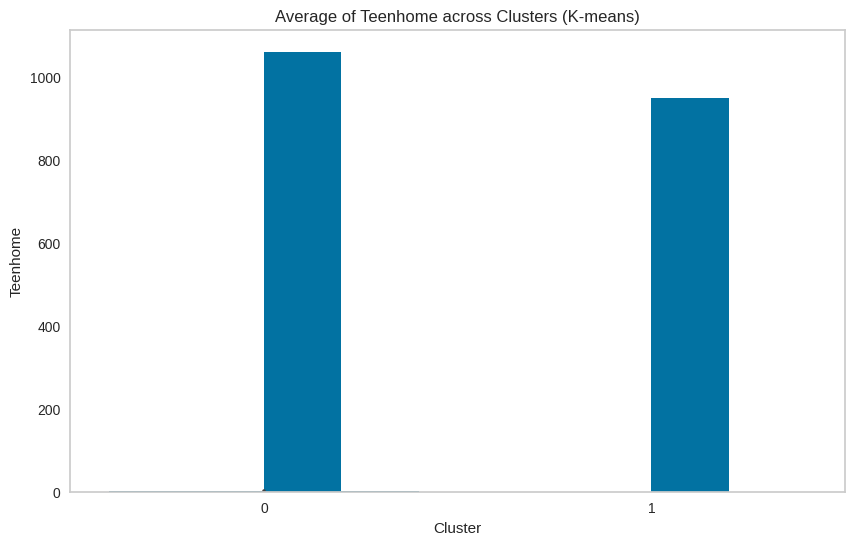

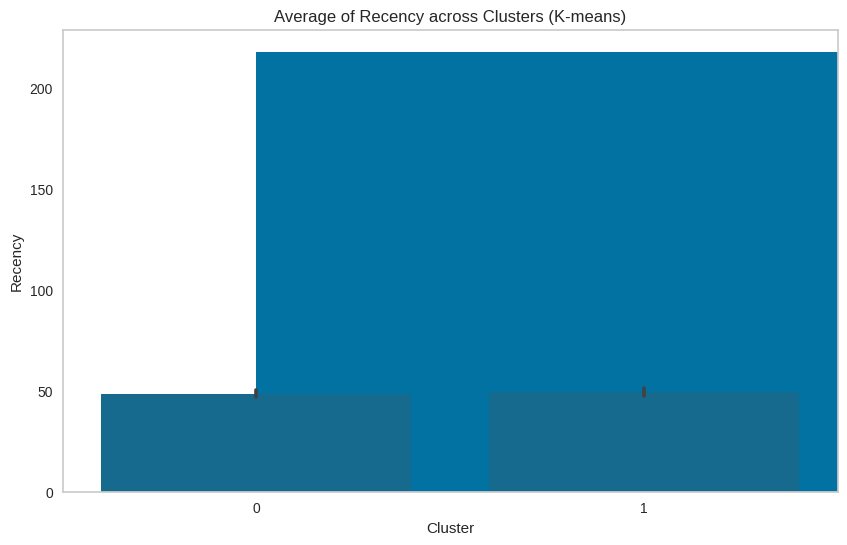

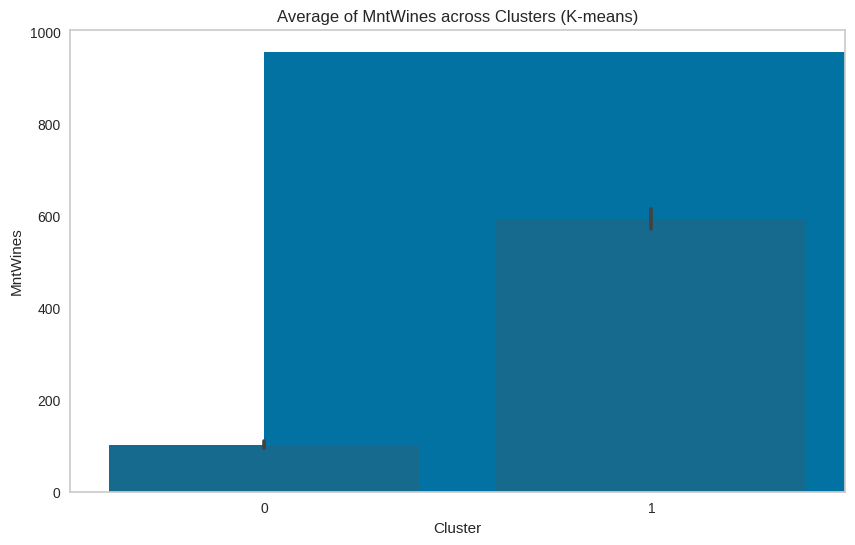

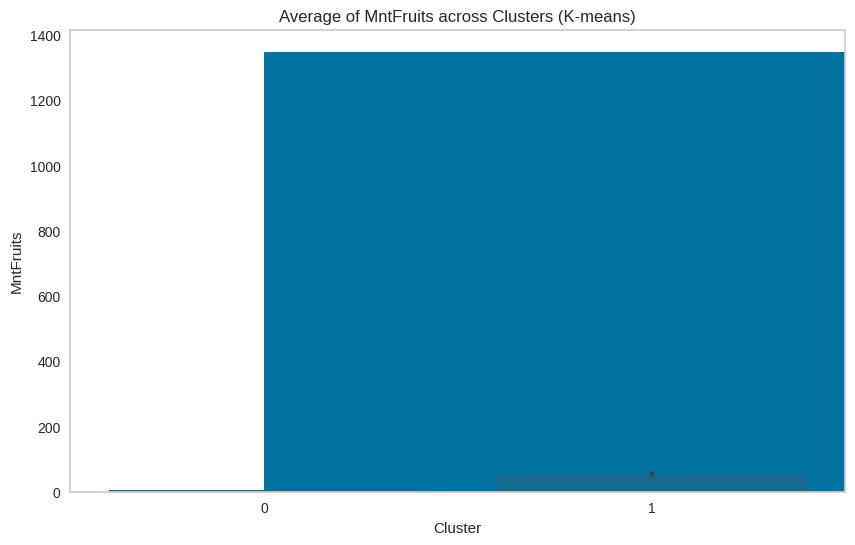

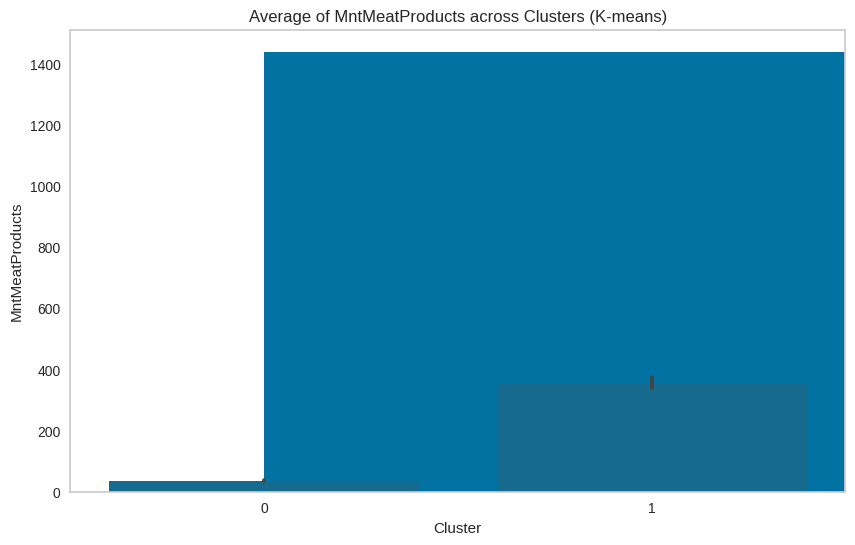

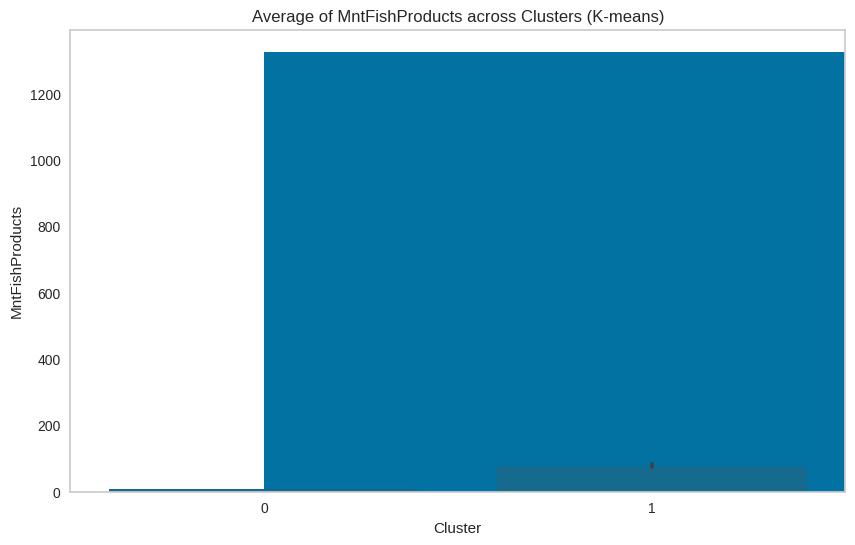

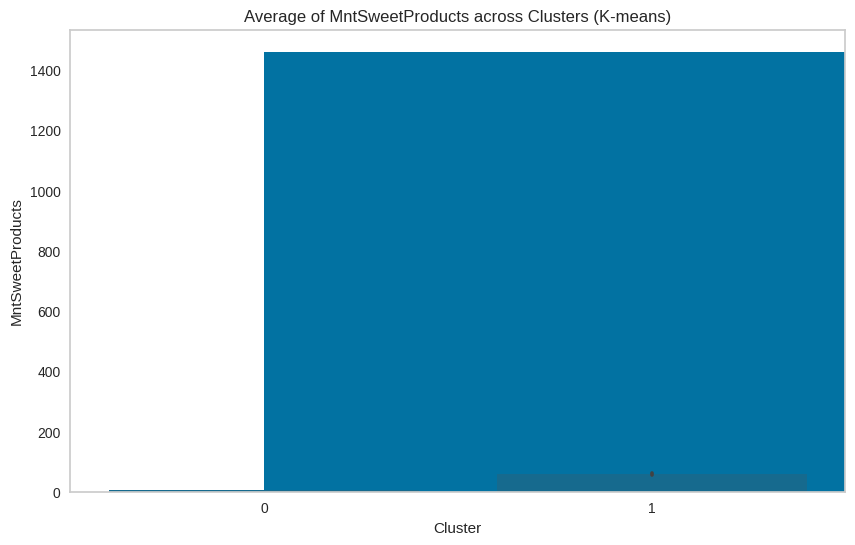

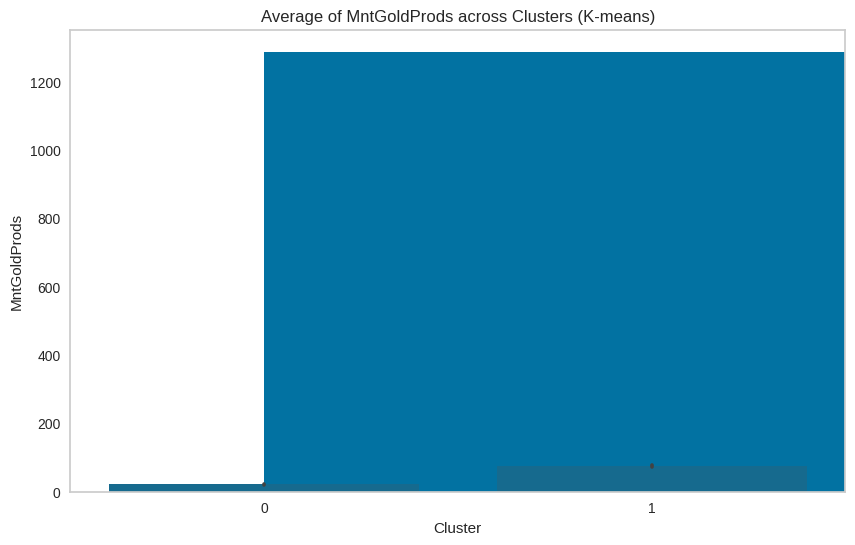

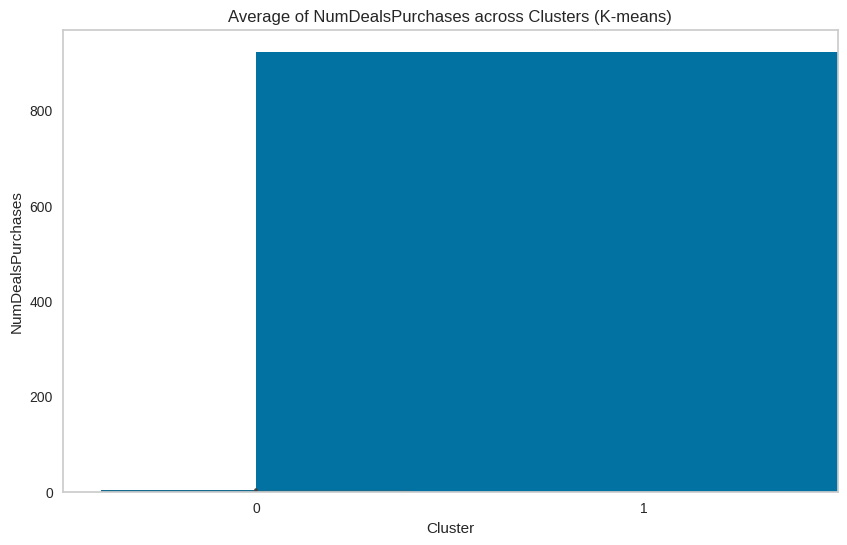

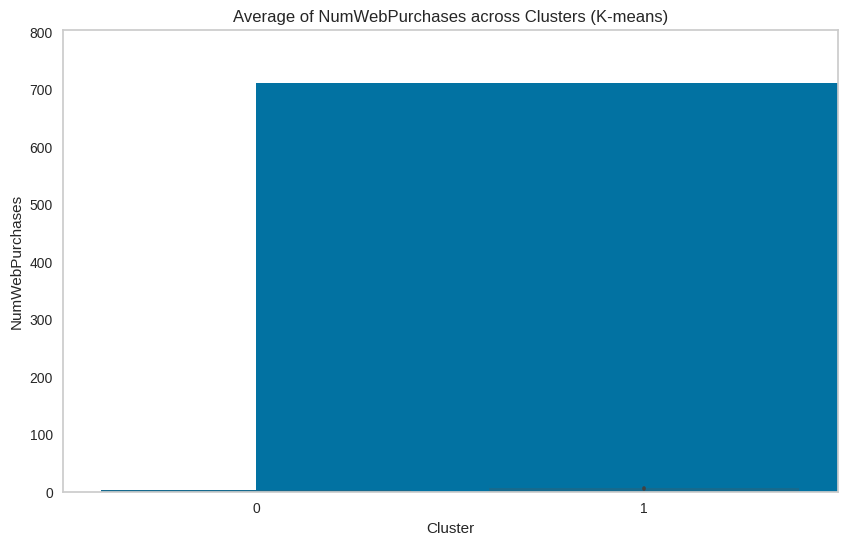

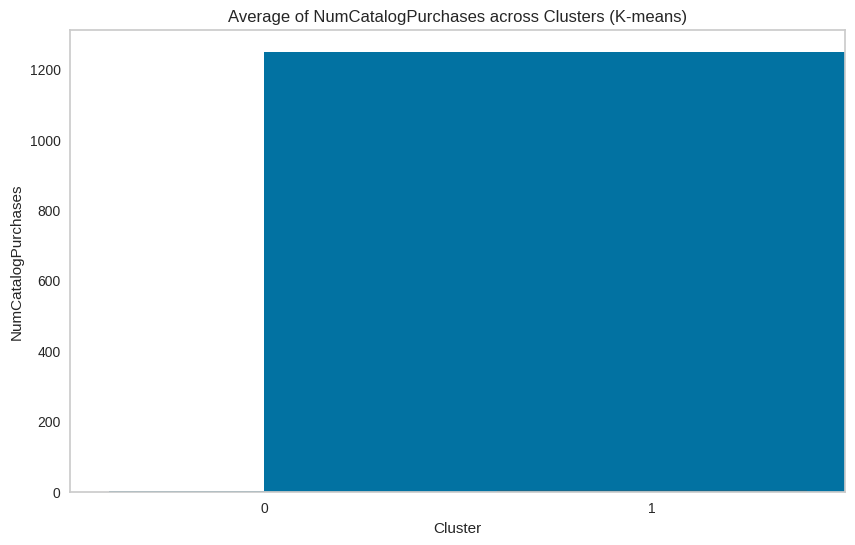

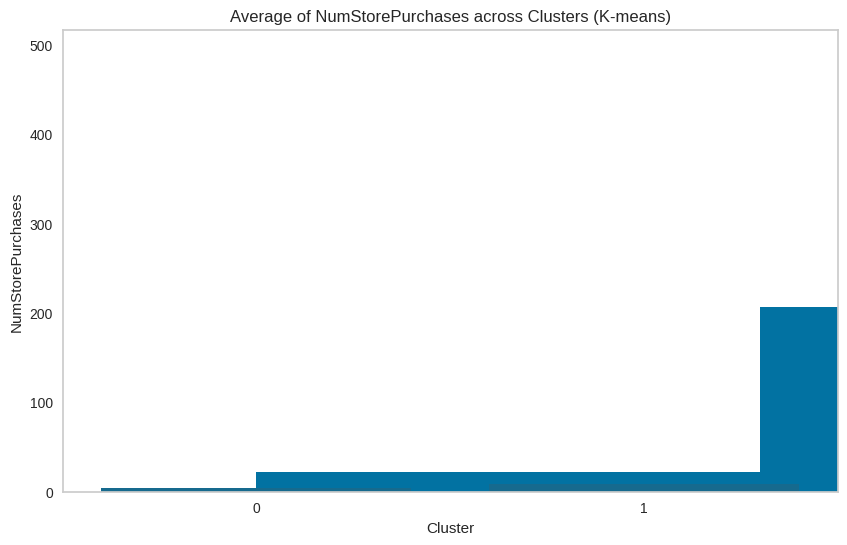

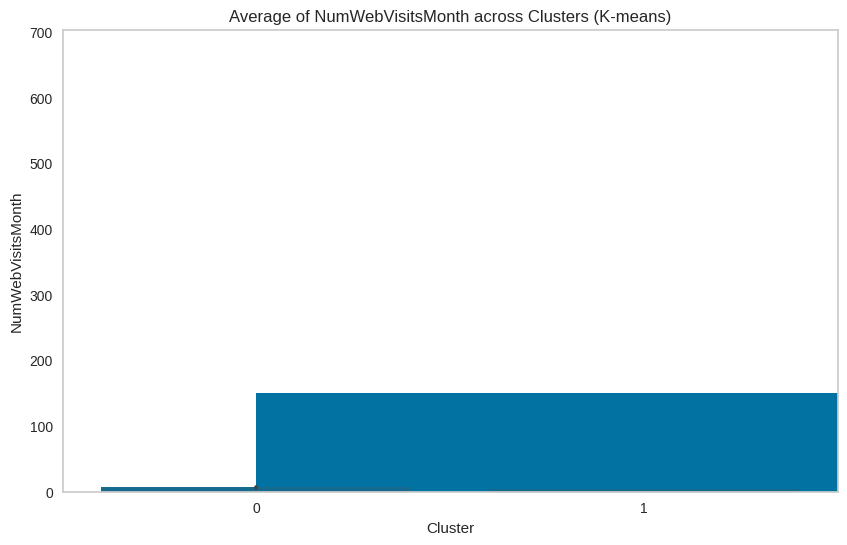

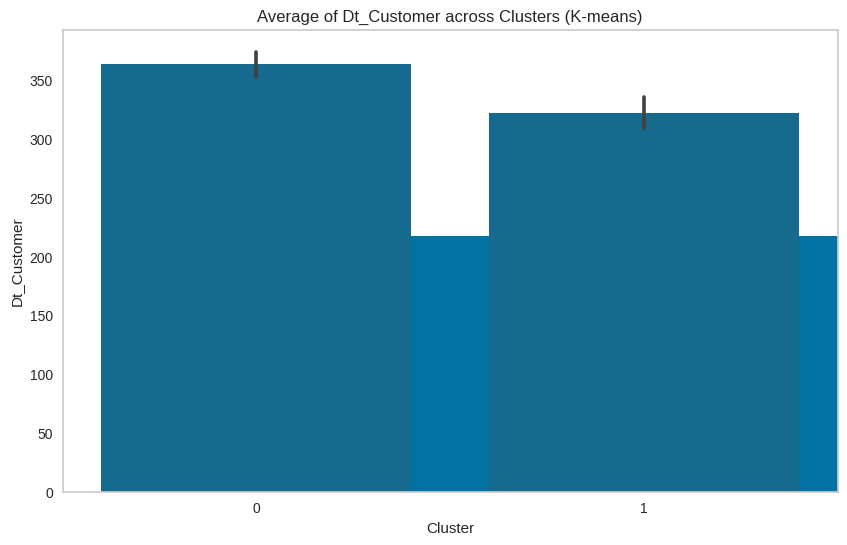

In [ ]:
# Write your code here

for col in cols_visualise:
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    data[col].hist(bins=10, grid=False)
    sns.barplot(data,x='cluster_labels',y=col)
    plt.title(f'Average of {col} across Clusters (K-means)')
    plt.xlabel('Cluster')
    plt.ylabel(col)
    plt.ylim(bottom=data[col].min())
    #plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

##### **Observations:** Cannot get some bar plots to render correctly; no new conclusions derived as compared to question 14.

## **Business Recommedations**

#### Cluster 1 describes older, wealthier individuals who consume higher number of of wines and meat products. They tend to make more purchases at the store, online, or via catalog.

#### Cluster 0 consists of younger individuals with kids. They tend to spend less on wine and meat products. They interact more with the store website.


In [ ]:
!jupyter nbconvert --execute --to html "/content/drive/MyDrive/Colab Notebooks/Learner_Fullcode.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Learner_Fullcode.ipynb to html
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
[NbConvertApp] WARNING | Alternative text is missing on 63 image(s).
[NbConvertApp] Writing 2773916 bytes to /content/drive/MyDrive/Colab Notebooks/Learner_Fullcode.html
